# DST-II Precision Test

In [133]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [134]:
import json
import pywt
import math
import matplotlib.pyplot as plt
import numpy as np
from dst import S
from dst import PatternDetector
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

## Signals

In [135]:
signals_names = [
 'Blocks',
 'Bumps',
 'HeaviSine',
 'Doppler',
 'Ramp',
 'TwoChirp',
 'QuadChirp',
 'MishMash',
 'WernerSorrows',
 'HypChirps',
 'LinChirps',
 'Chirps',
 'sineoneoverx',
]

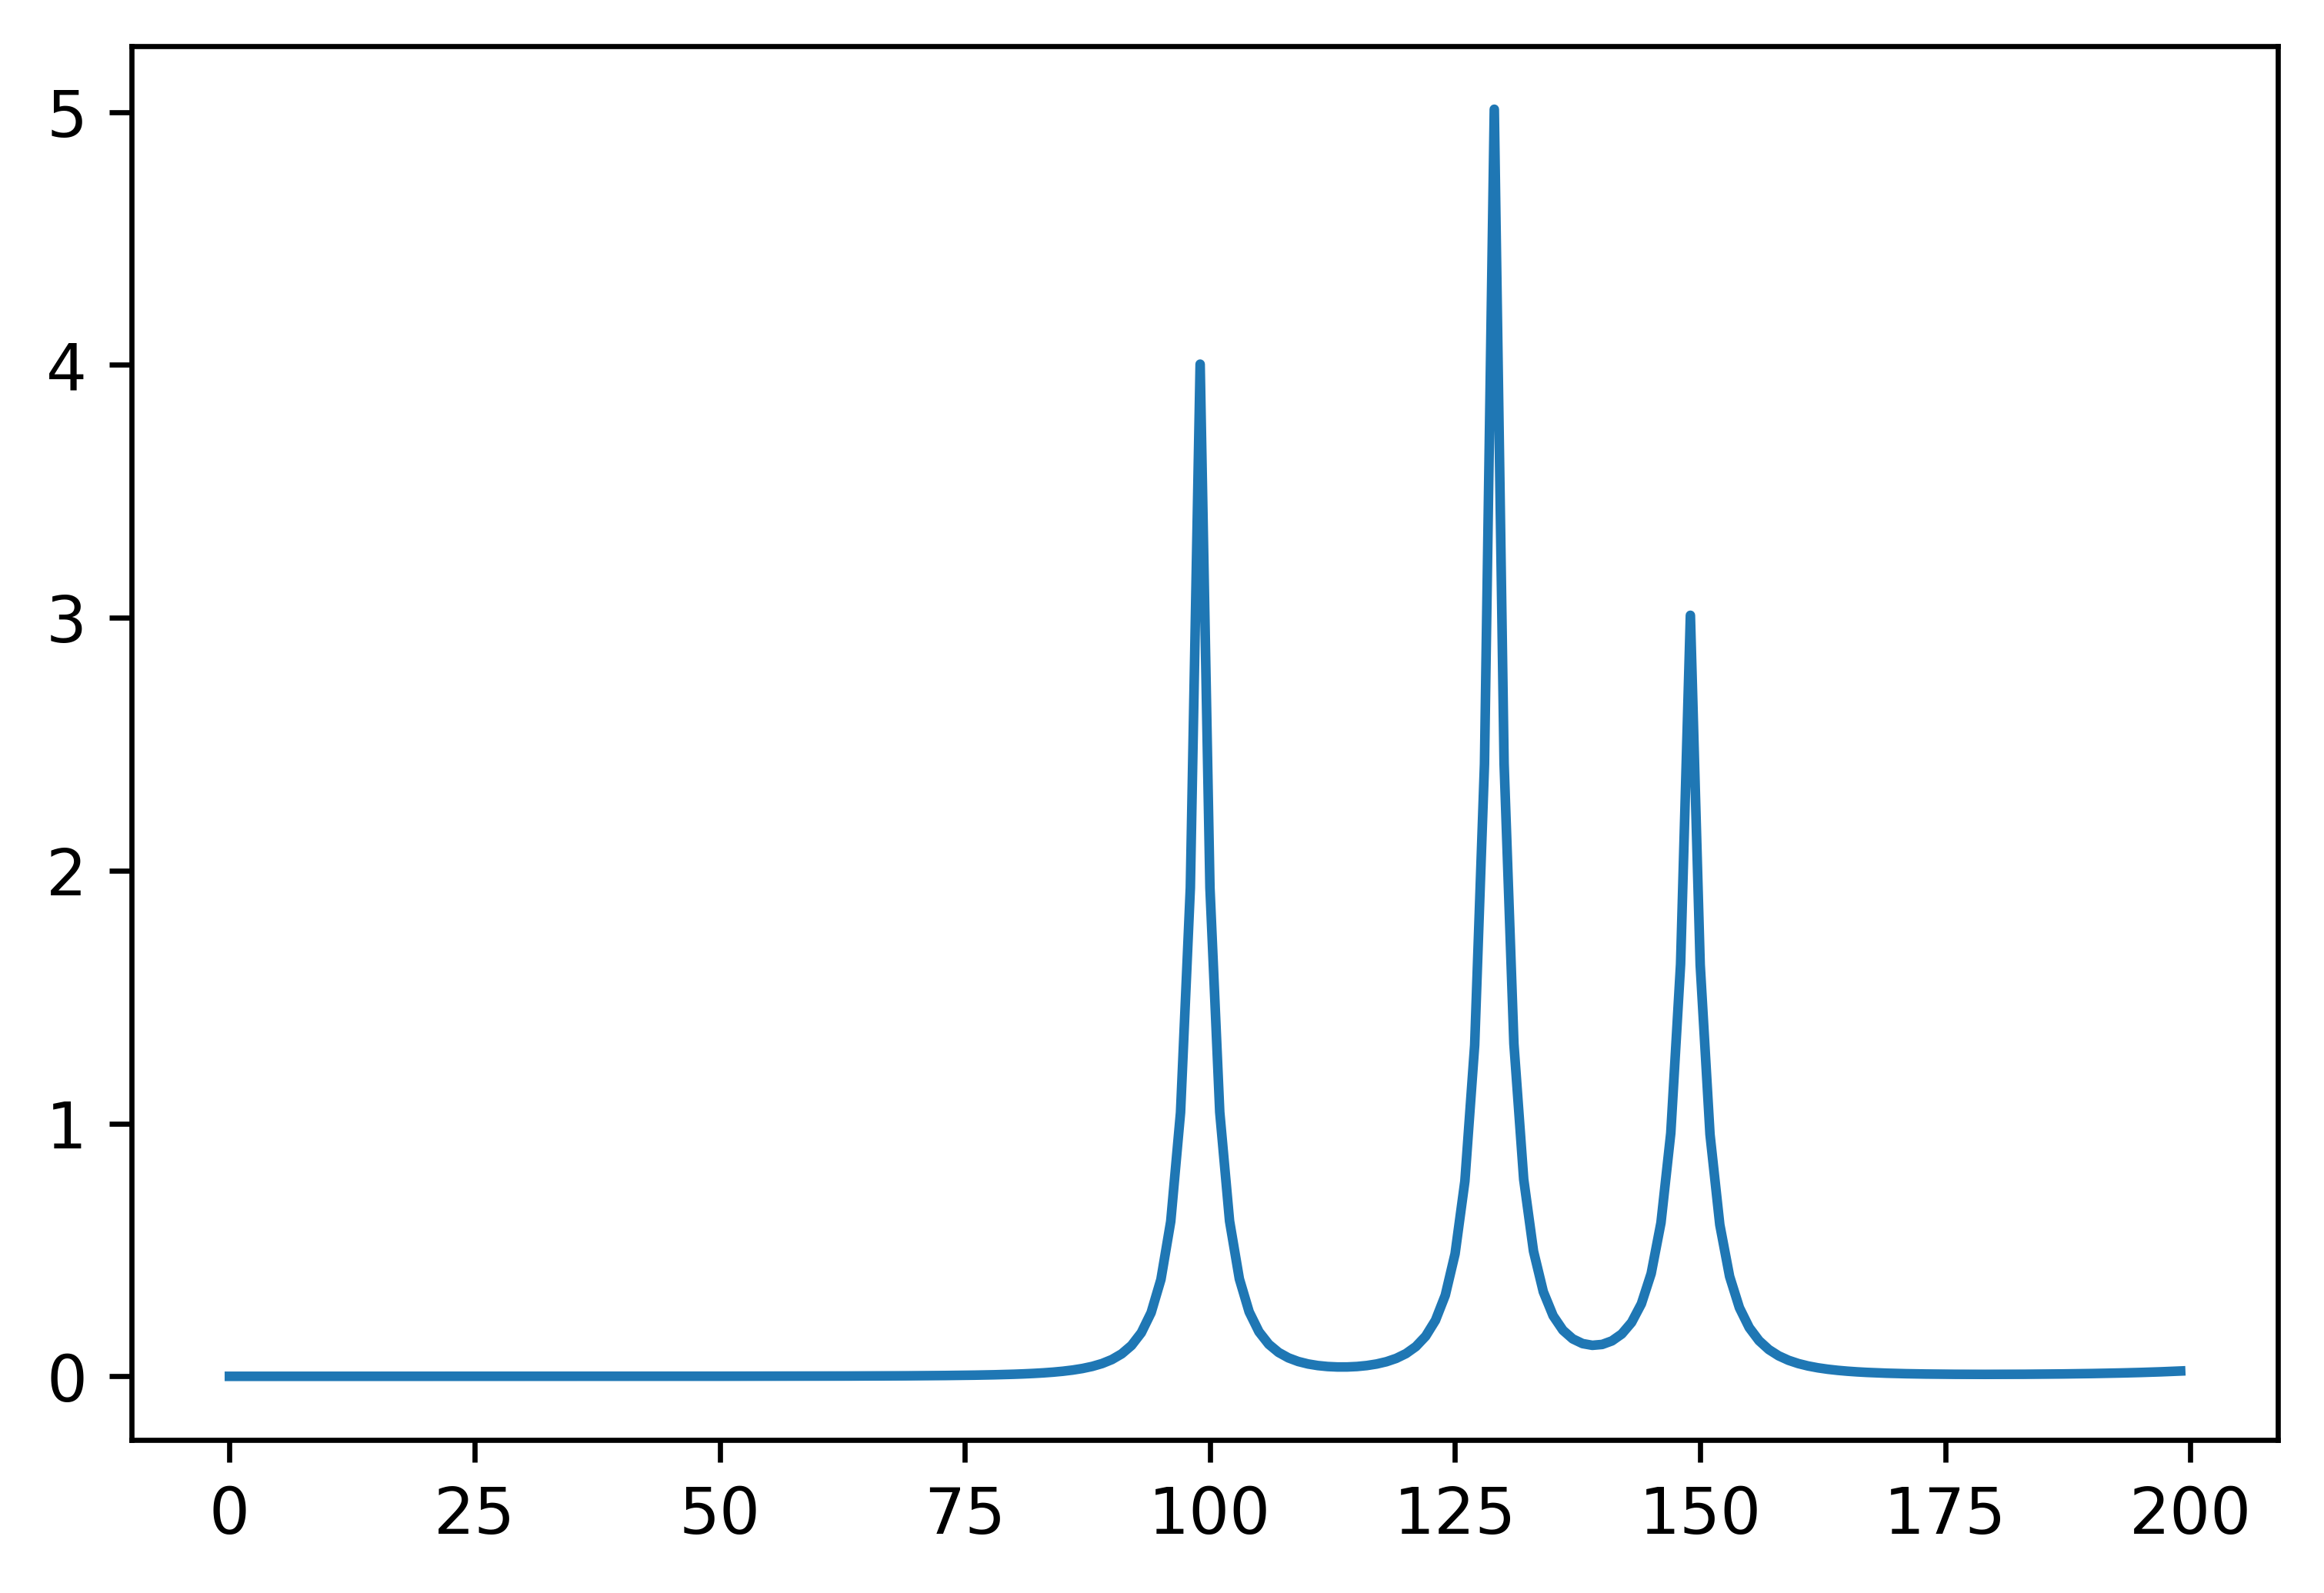

In [136]:
signals = []
for signal in signals_names:
    try:
        signals.append(pywt.data.demo_signal(signal))
    except ValueError:
        signals.append(pywt.data.demo_signal(signal, 1000))
        
# change this variable
signal_length = 200

for i in range(len(signals)):
    signals[i] = signals[i][:signal_length]
signal = signals[1]
plt.gcf().set_dpi(600)
plt.plot(np.arange(0, signal_length, 1), signal[:signal_length])
plt.show()

## Patterns

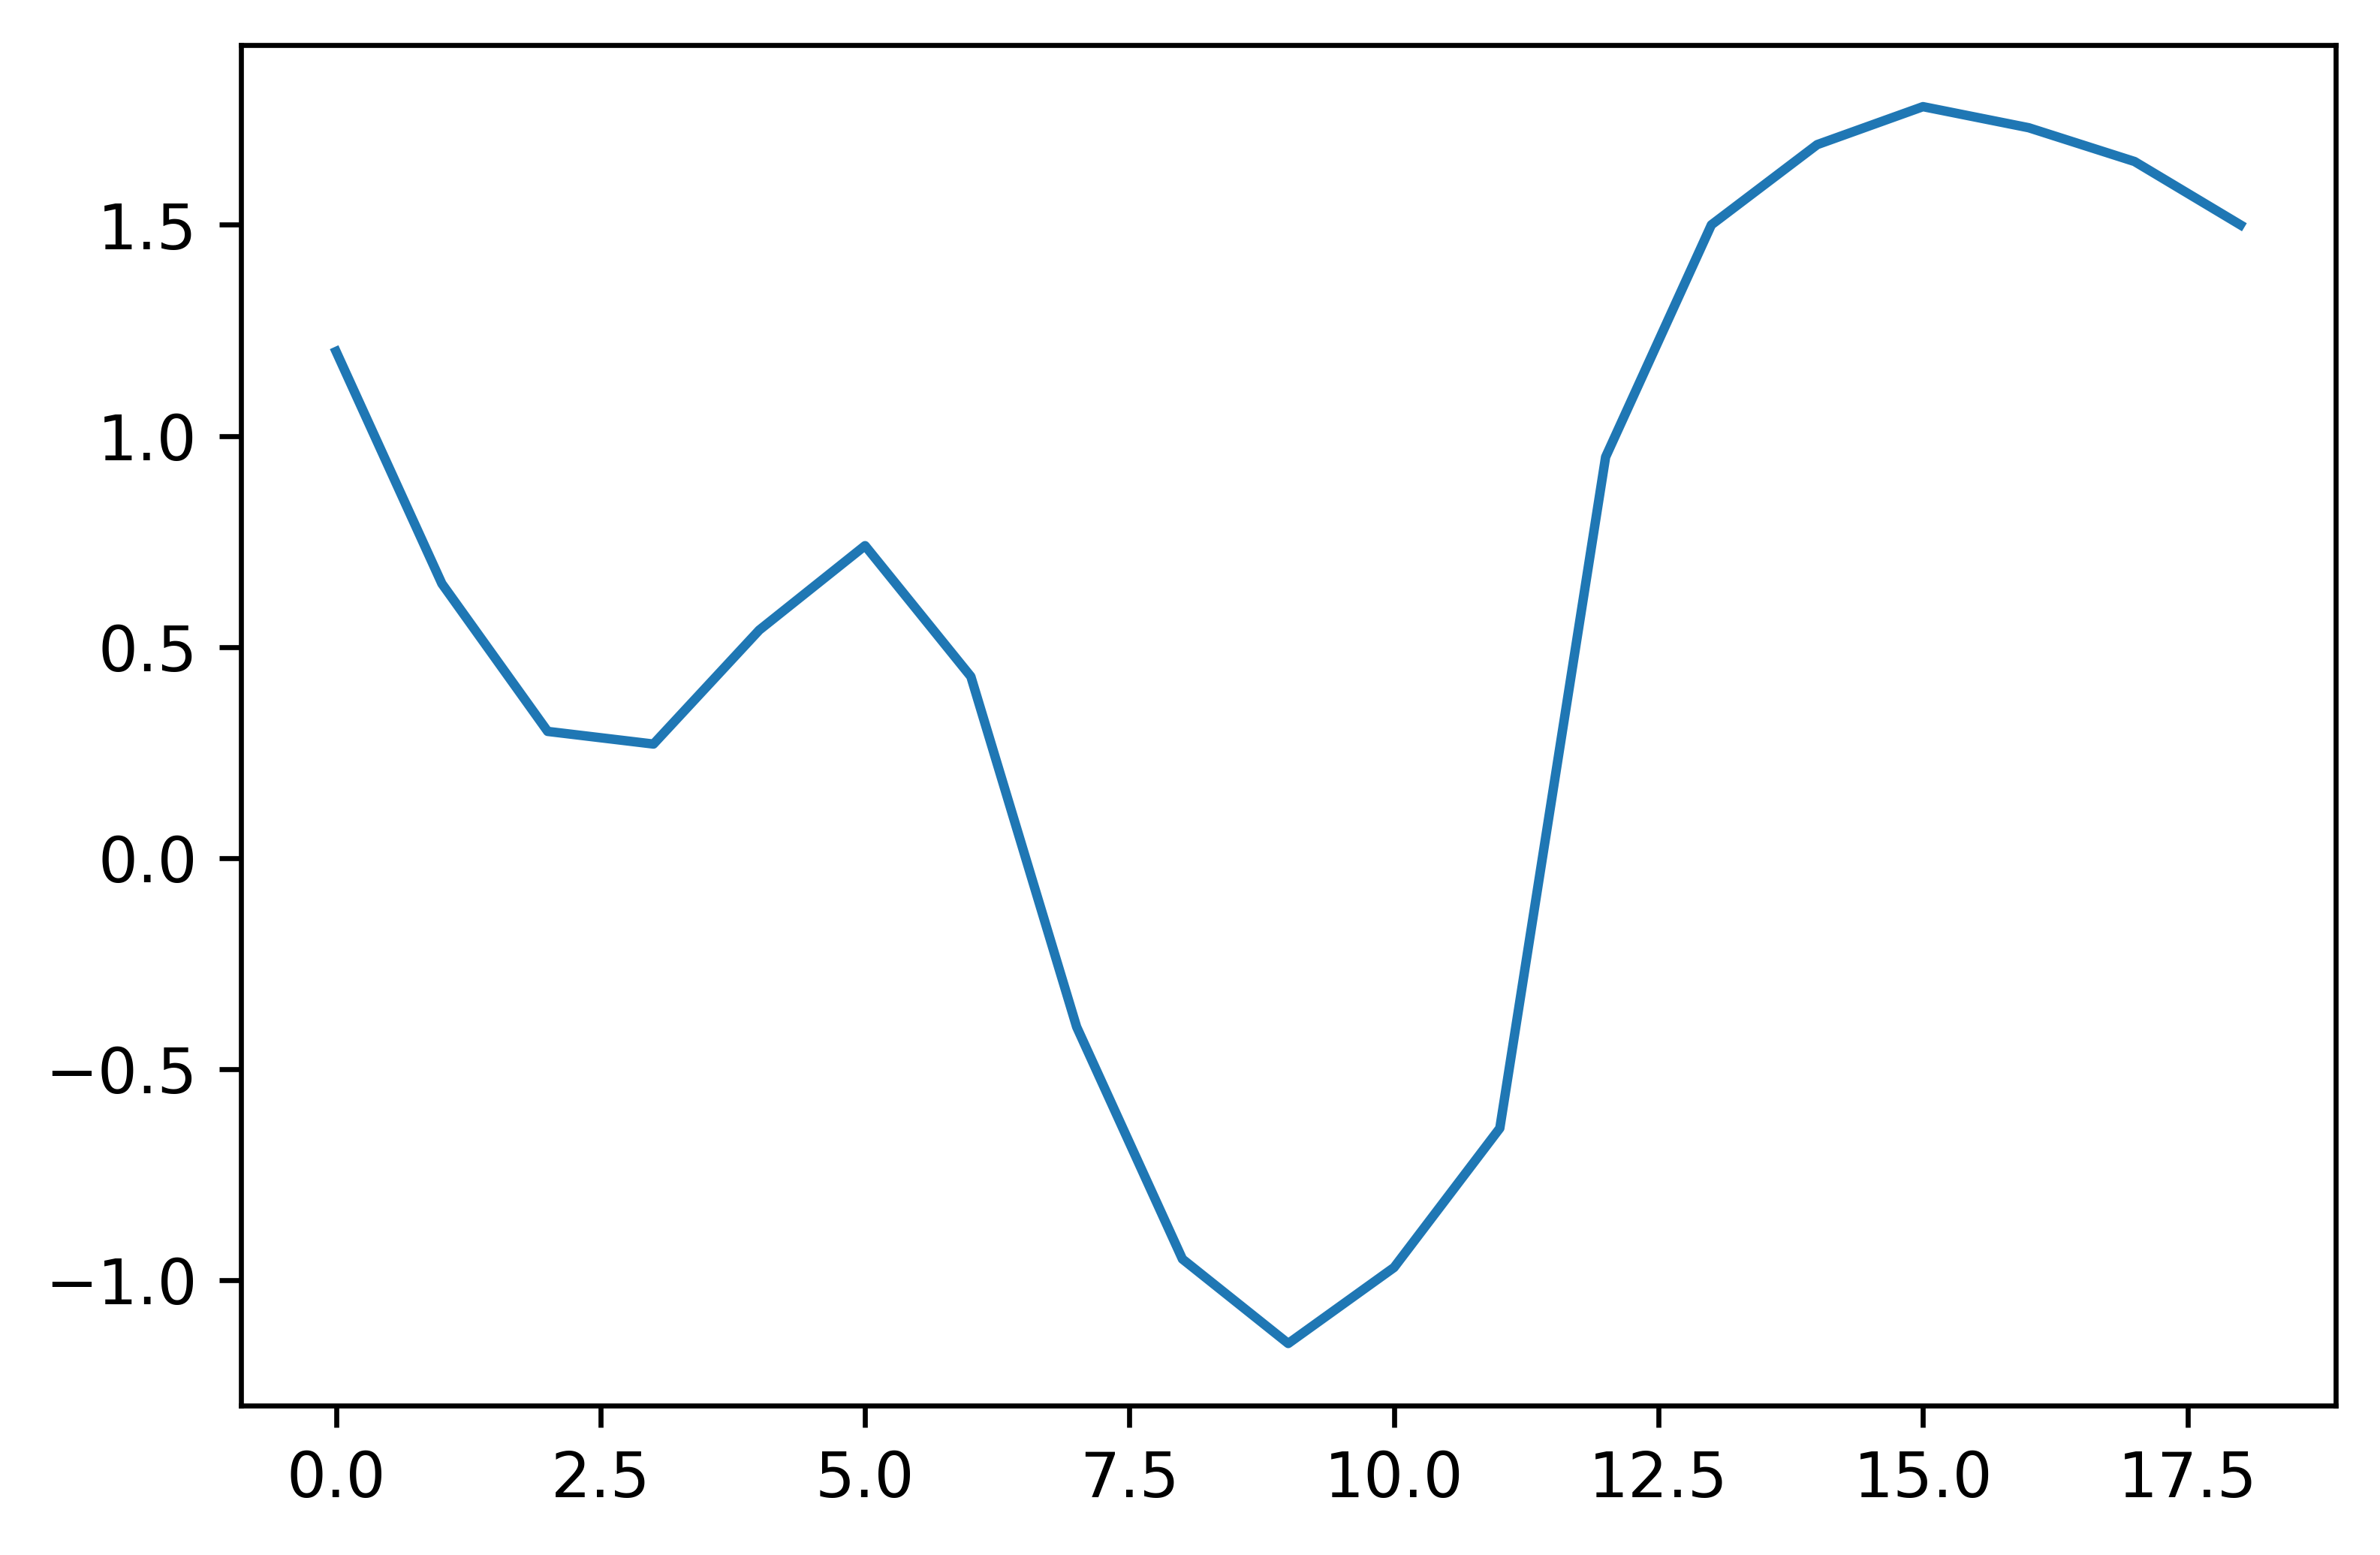

In [33]:
with open('../datasets/guido_patterns.json', 'r') as settings:
    data = json.load(settings)
    
number_of_patterns = -1

patterns = data['patterns'][3:4]
pattern = patterns[0]
plt.gcf().set_dpi(600)
plt.plot(np.arange(0, len(pattern), 1), pattern)
plt.show()

## Positions

In [34]:
values = [i for i in range(1, 500)]
positions = []
positions_count = 200
for i in range(positions_count):
    position = random.choice(values)
    values.remove(position)
    positions.append(position)

## Inserting patterns in signals

In [35]:
from collections import namedtuple


Record = namedtuple('Record', ['signal', 'pattern', 'position'])


def generate_test_dataset(signals, patterns, positions, size):
    dataset = []
    combinations = []
    
    for i in range(len(signals)):
        for j in range(len(patterns)):
            for k in positions:
                combinations.append((i, j, k))
                
    len_combinations = len(combinations)
    size = min(size, len_combinations)
    for _ in range(size):
        combination = random.choice(combinations)
        combinations.remove(combination)
        
        signal = np.array(signals[combination[0]])
        pattern = patterns[combination[1]]
        position = combination[2]
        
        start = position - 1 
        end = start + len(pattern)
        if end > len(signal) - 1:
            position = -1
        else:
            signal[start:end] = pattern
        
        dataset.append(Record(signal, pattern, position))
    return dataset    

In [36]:
test_dataset = generate_test_dataset(signals, patterns, positions, 500)

### Taking an example from dataset

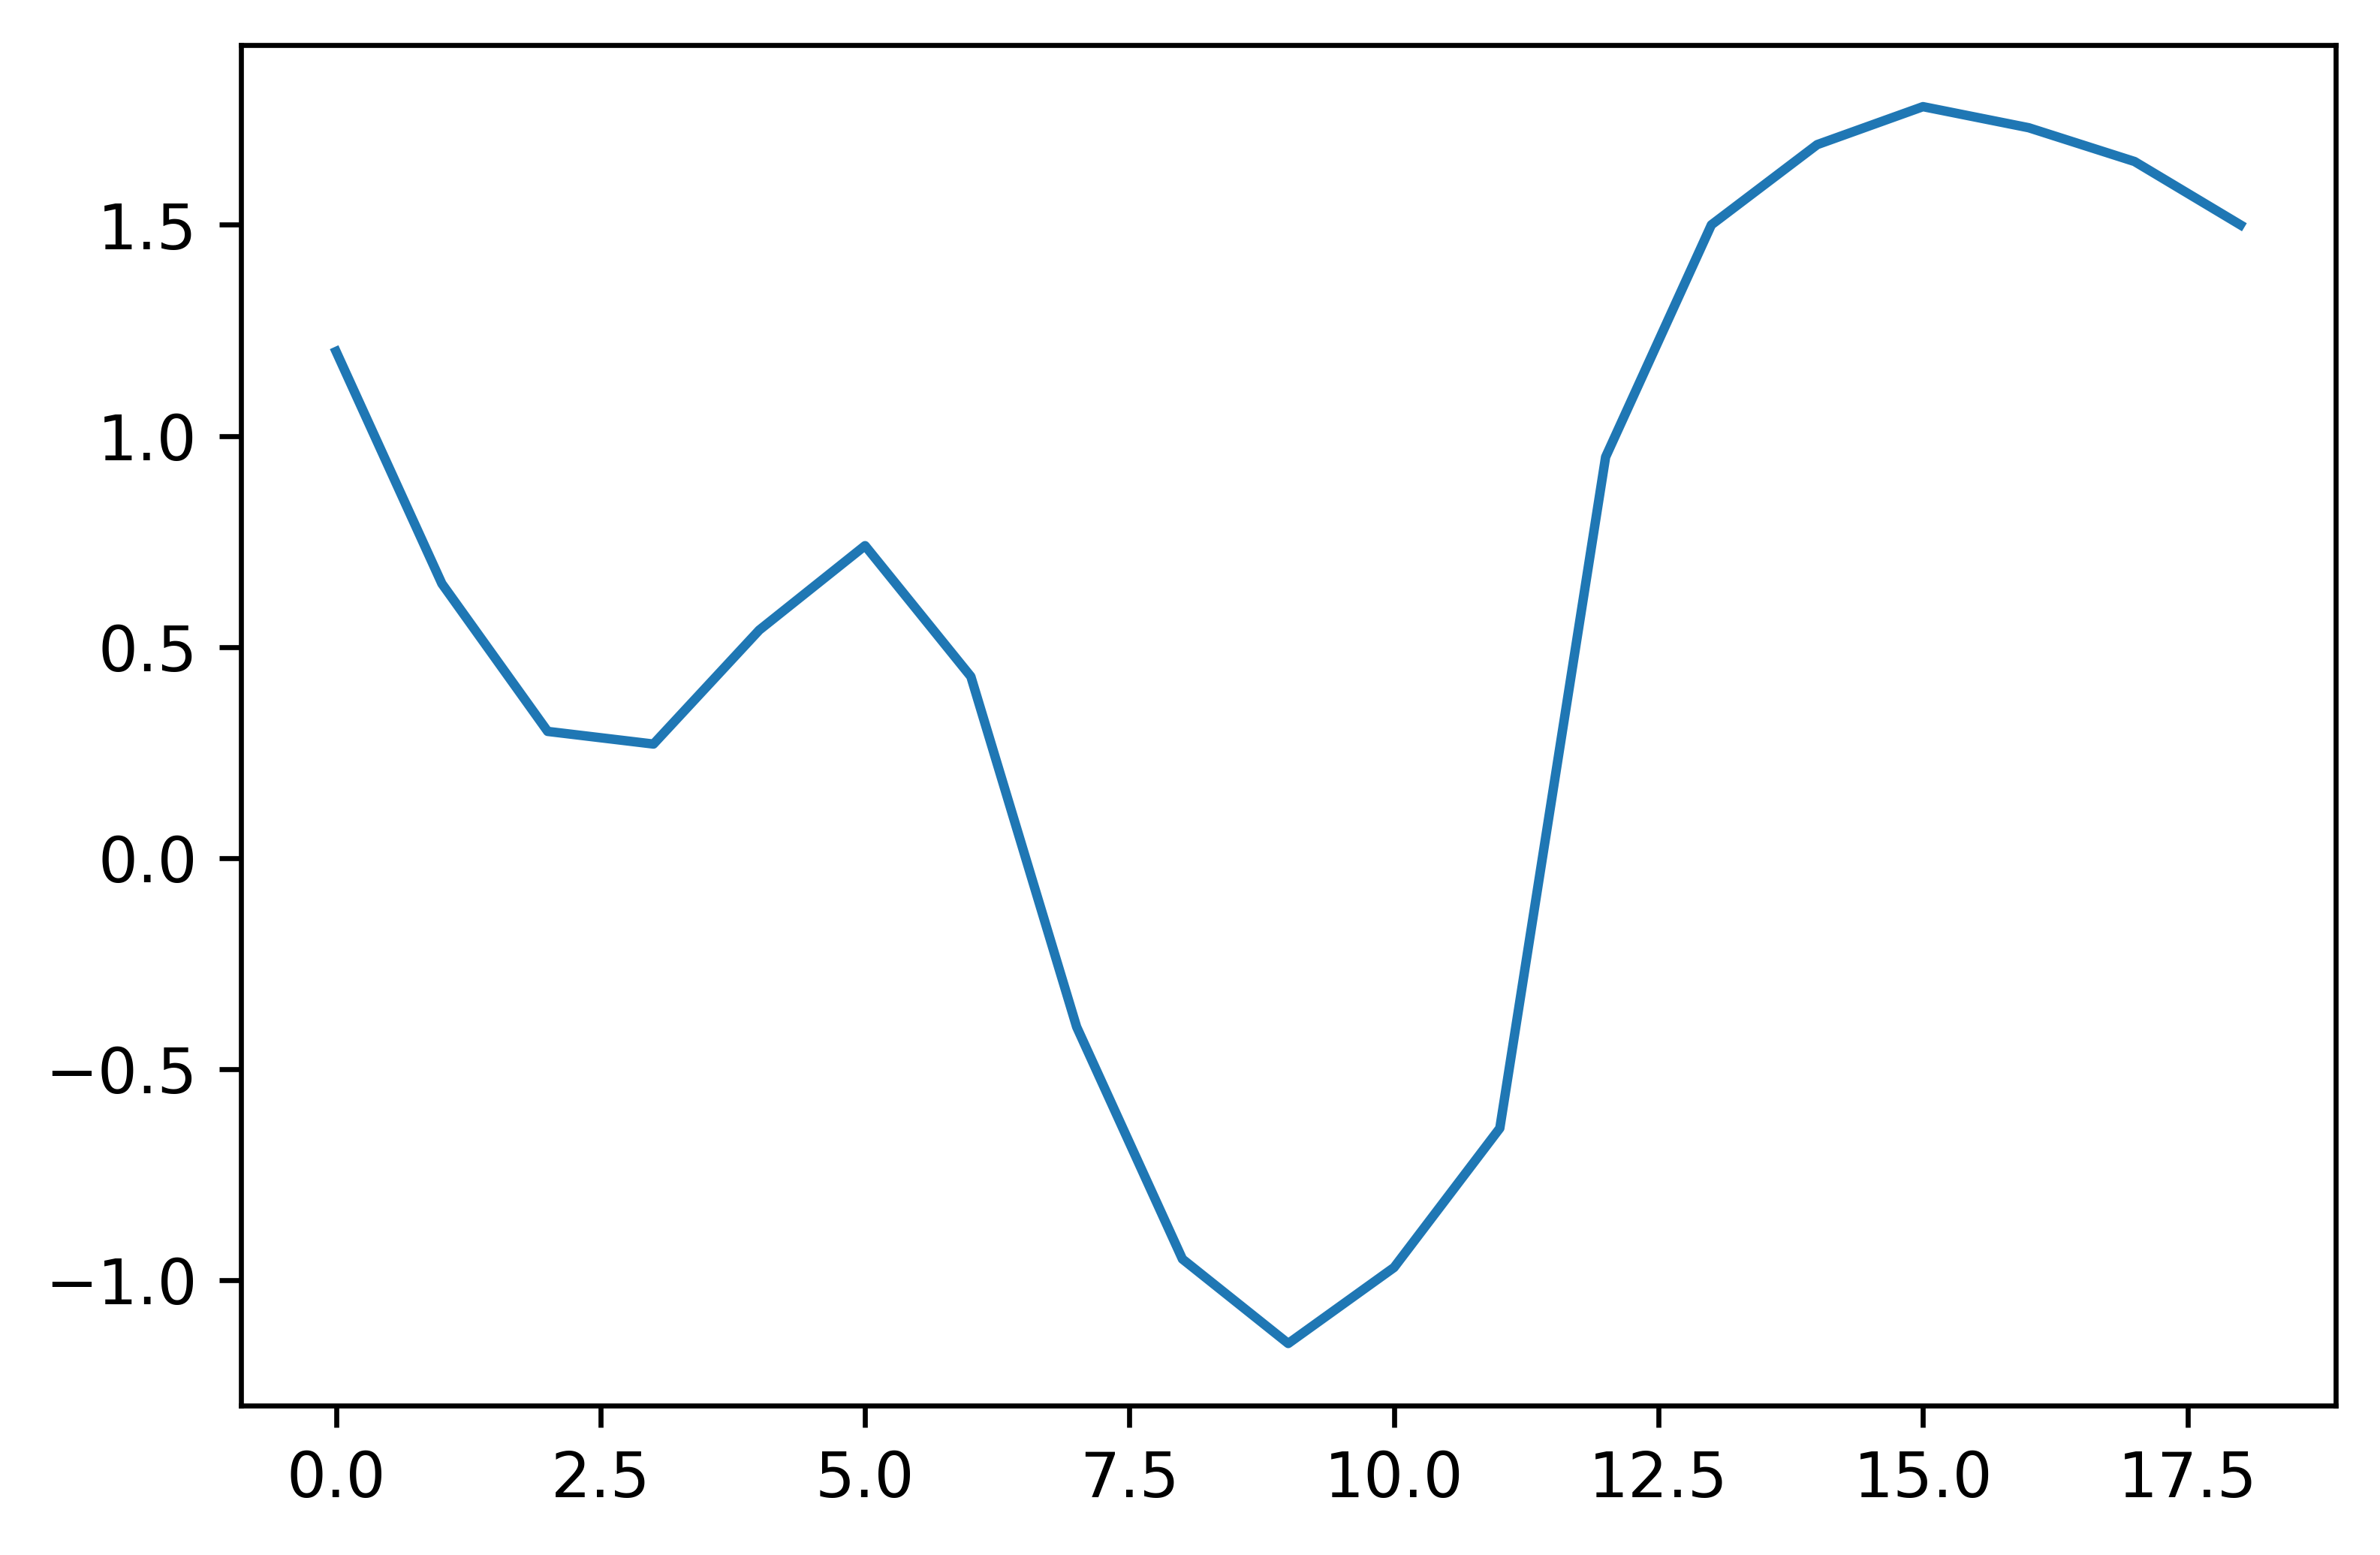

In [37]:
index = 168
pattern = test_dataset[index].pattern
plt.gcf().set_dpi(600)
plt.plot(np.arange(0, len(pattern), 1), pattern)
plt.show()

91


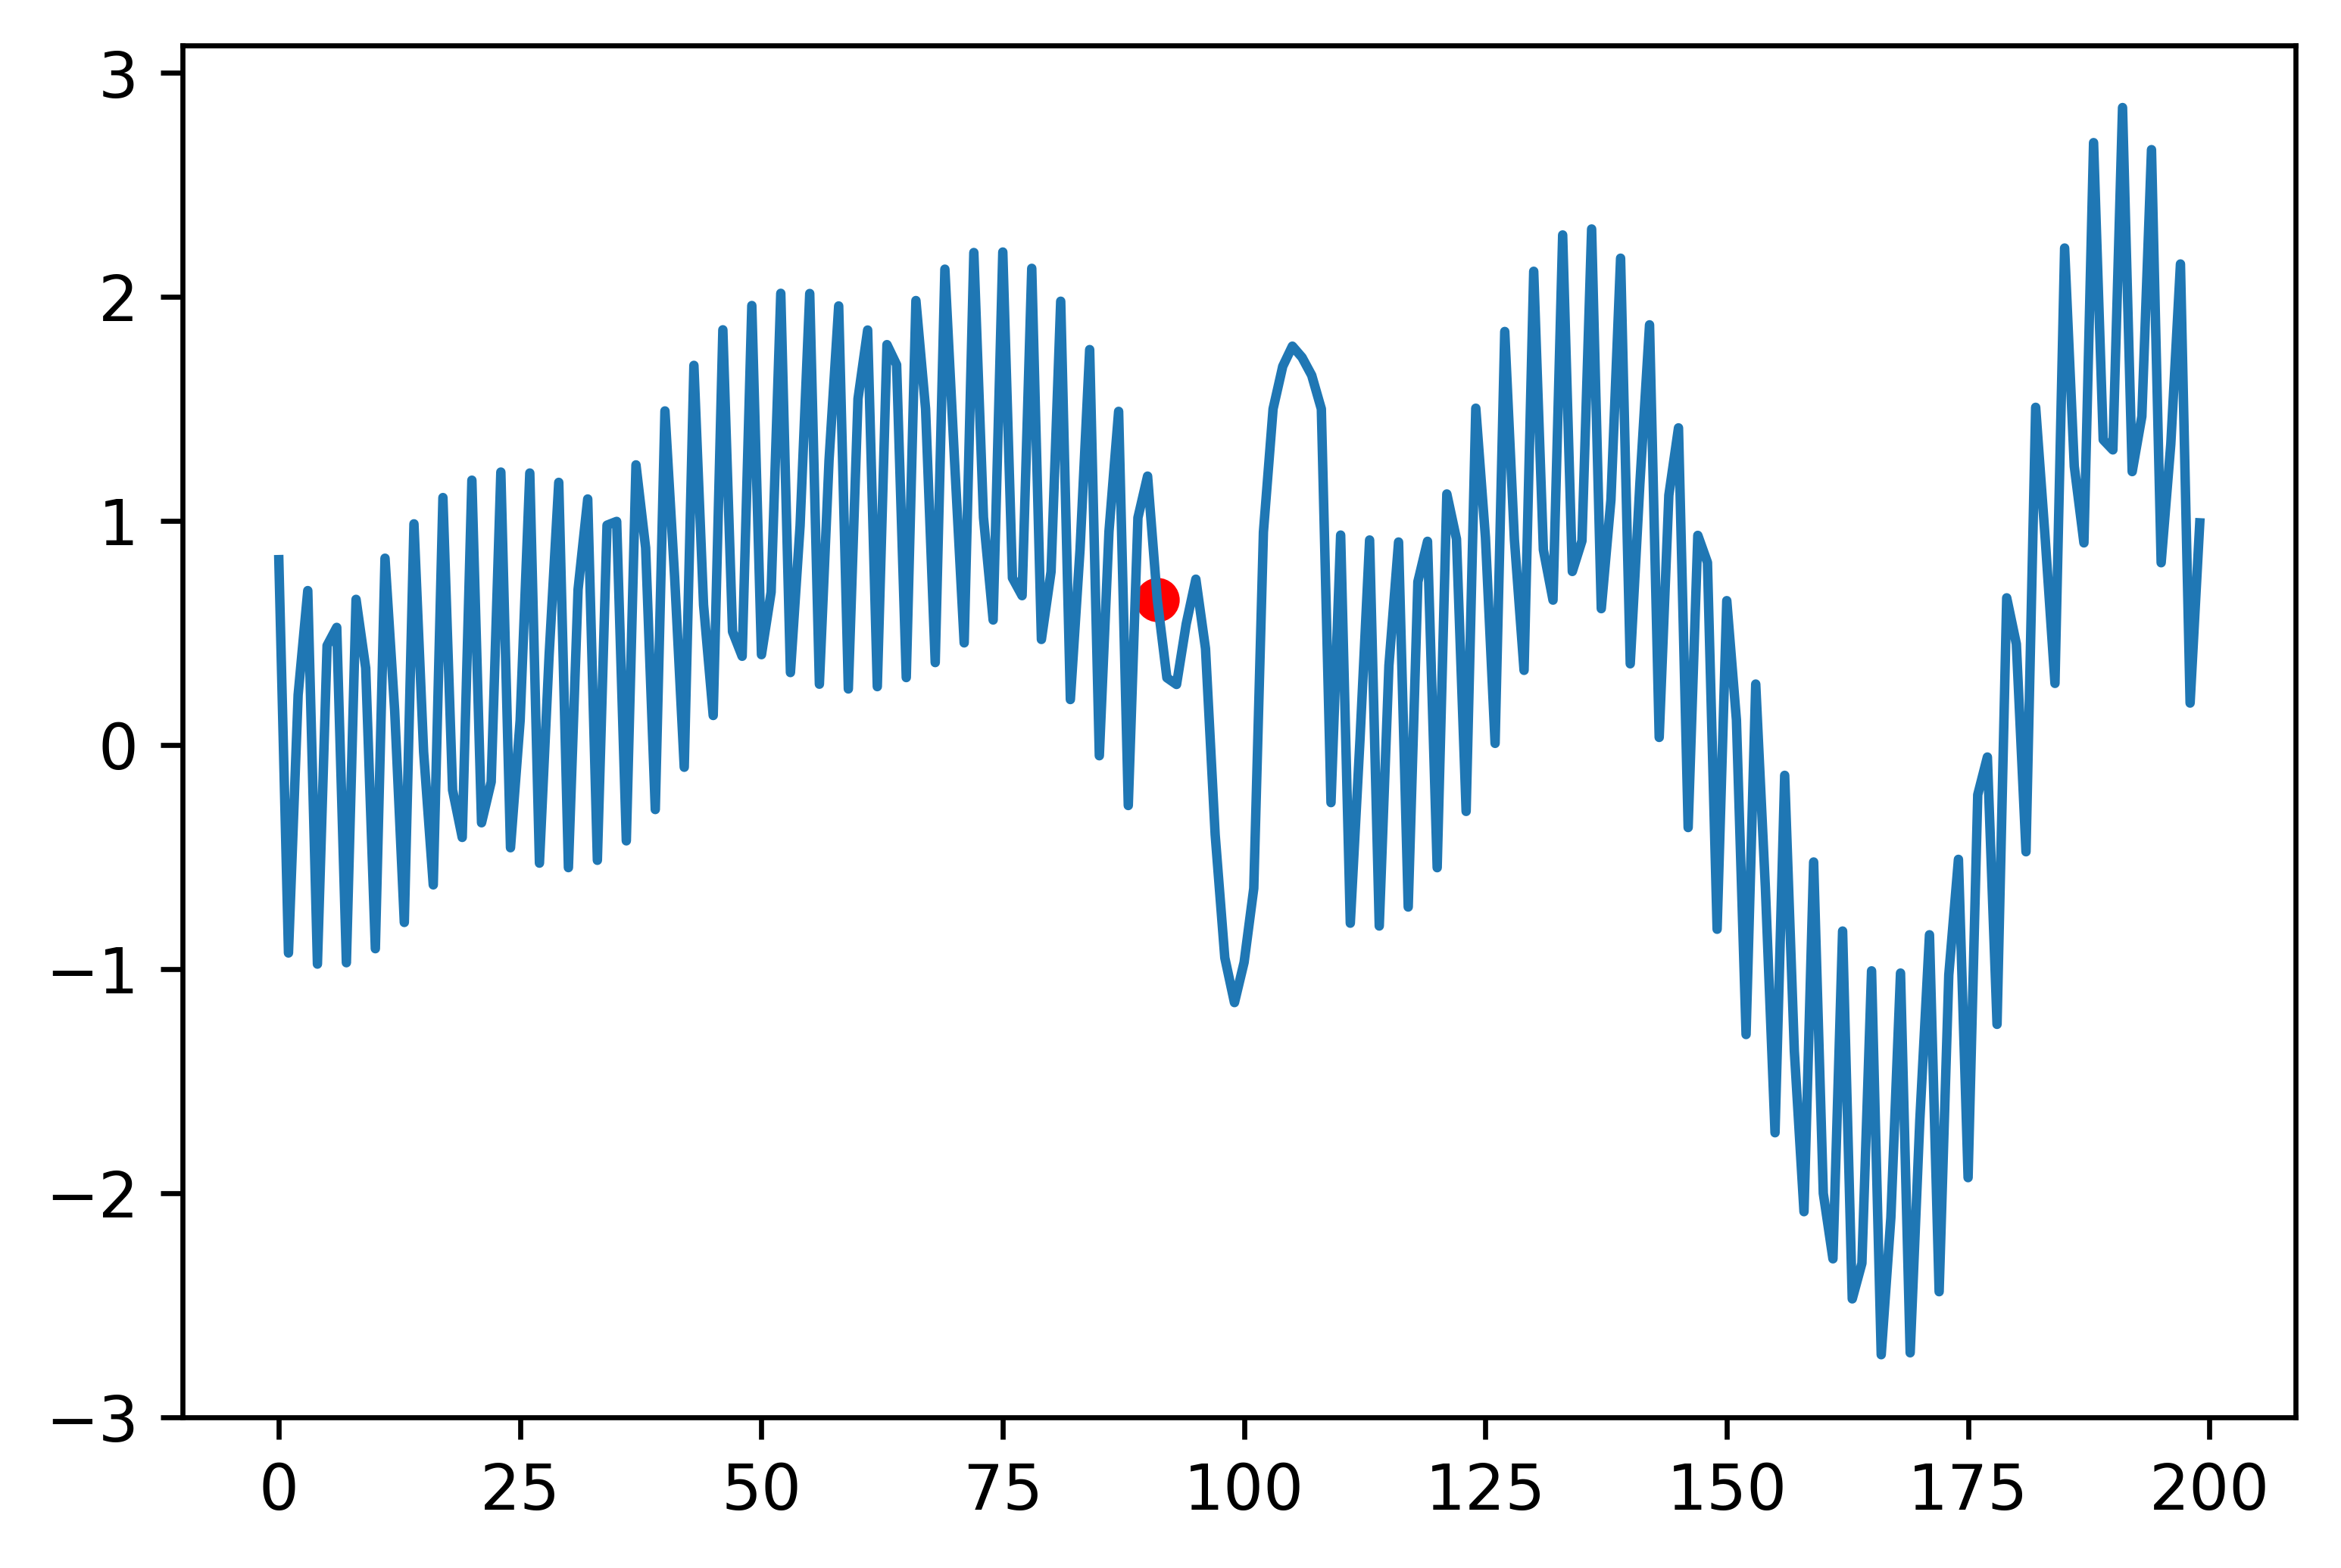

In [38]:
signal = test_dataset[index].signal
pos = test_dataset[index].position
print(pos)
plt.gcf().set_dpi(600)
plt.plot(pos, signal[pos], 'ro')
plt.plot(np.arange(0, signal_length, 1), signal[:signal_length])
plt.show()

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q14**2 + q15**2 + q16**2 + q17**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q14 + q15 + q16 + q17 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 14*q14 + 15*q15 + 16*q16 + 17*q17 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 196*q14 + 225*q15 + 256*q16 + 289*q17 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 2744*q14 + 3375*q15 + 4096*q16 + 4913*q17 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 38416*q14 + 50625*q15 + 65536*q16 + 83521*q17 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
q1 + 100000*q10 + 161051*q11 + 248832*q12 + 371293*q13 + 537824*q14 + 759375*q15 + 1048576*q1

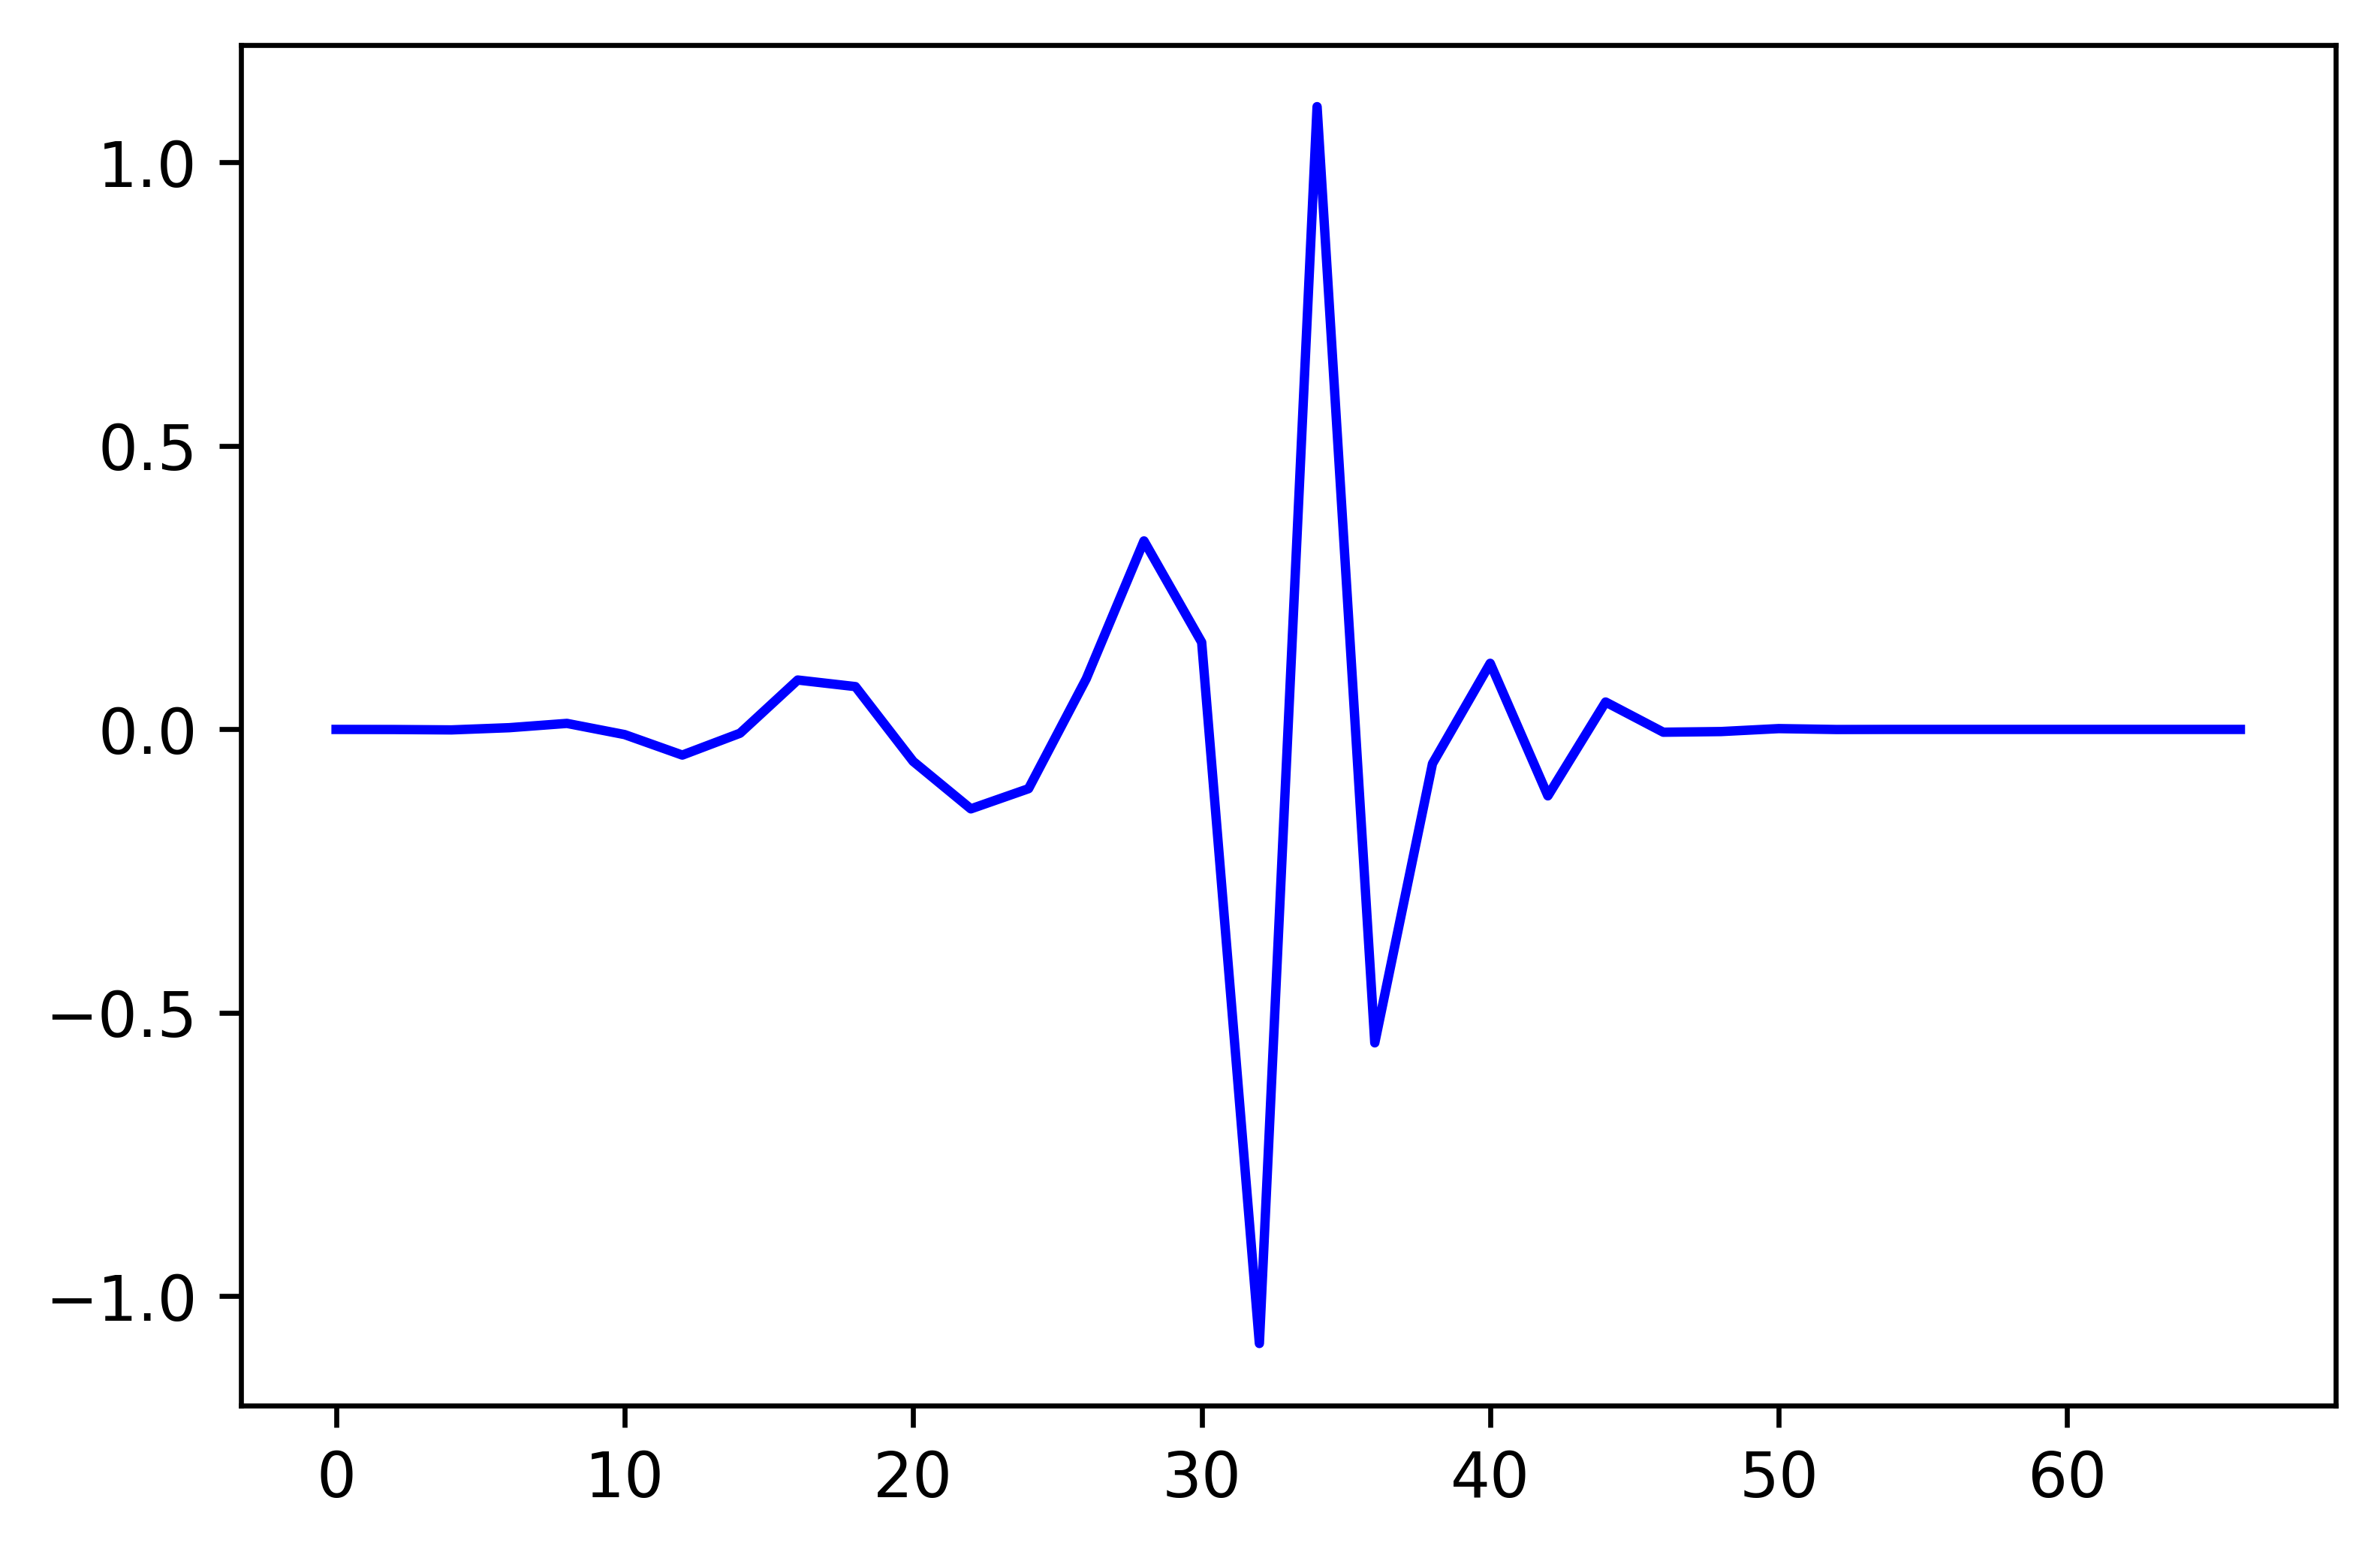

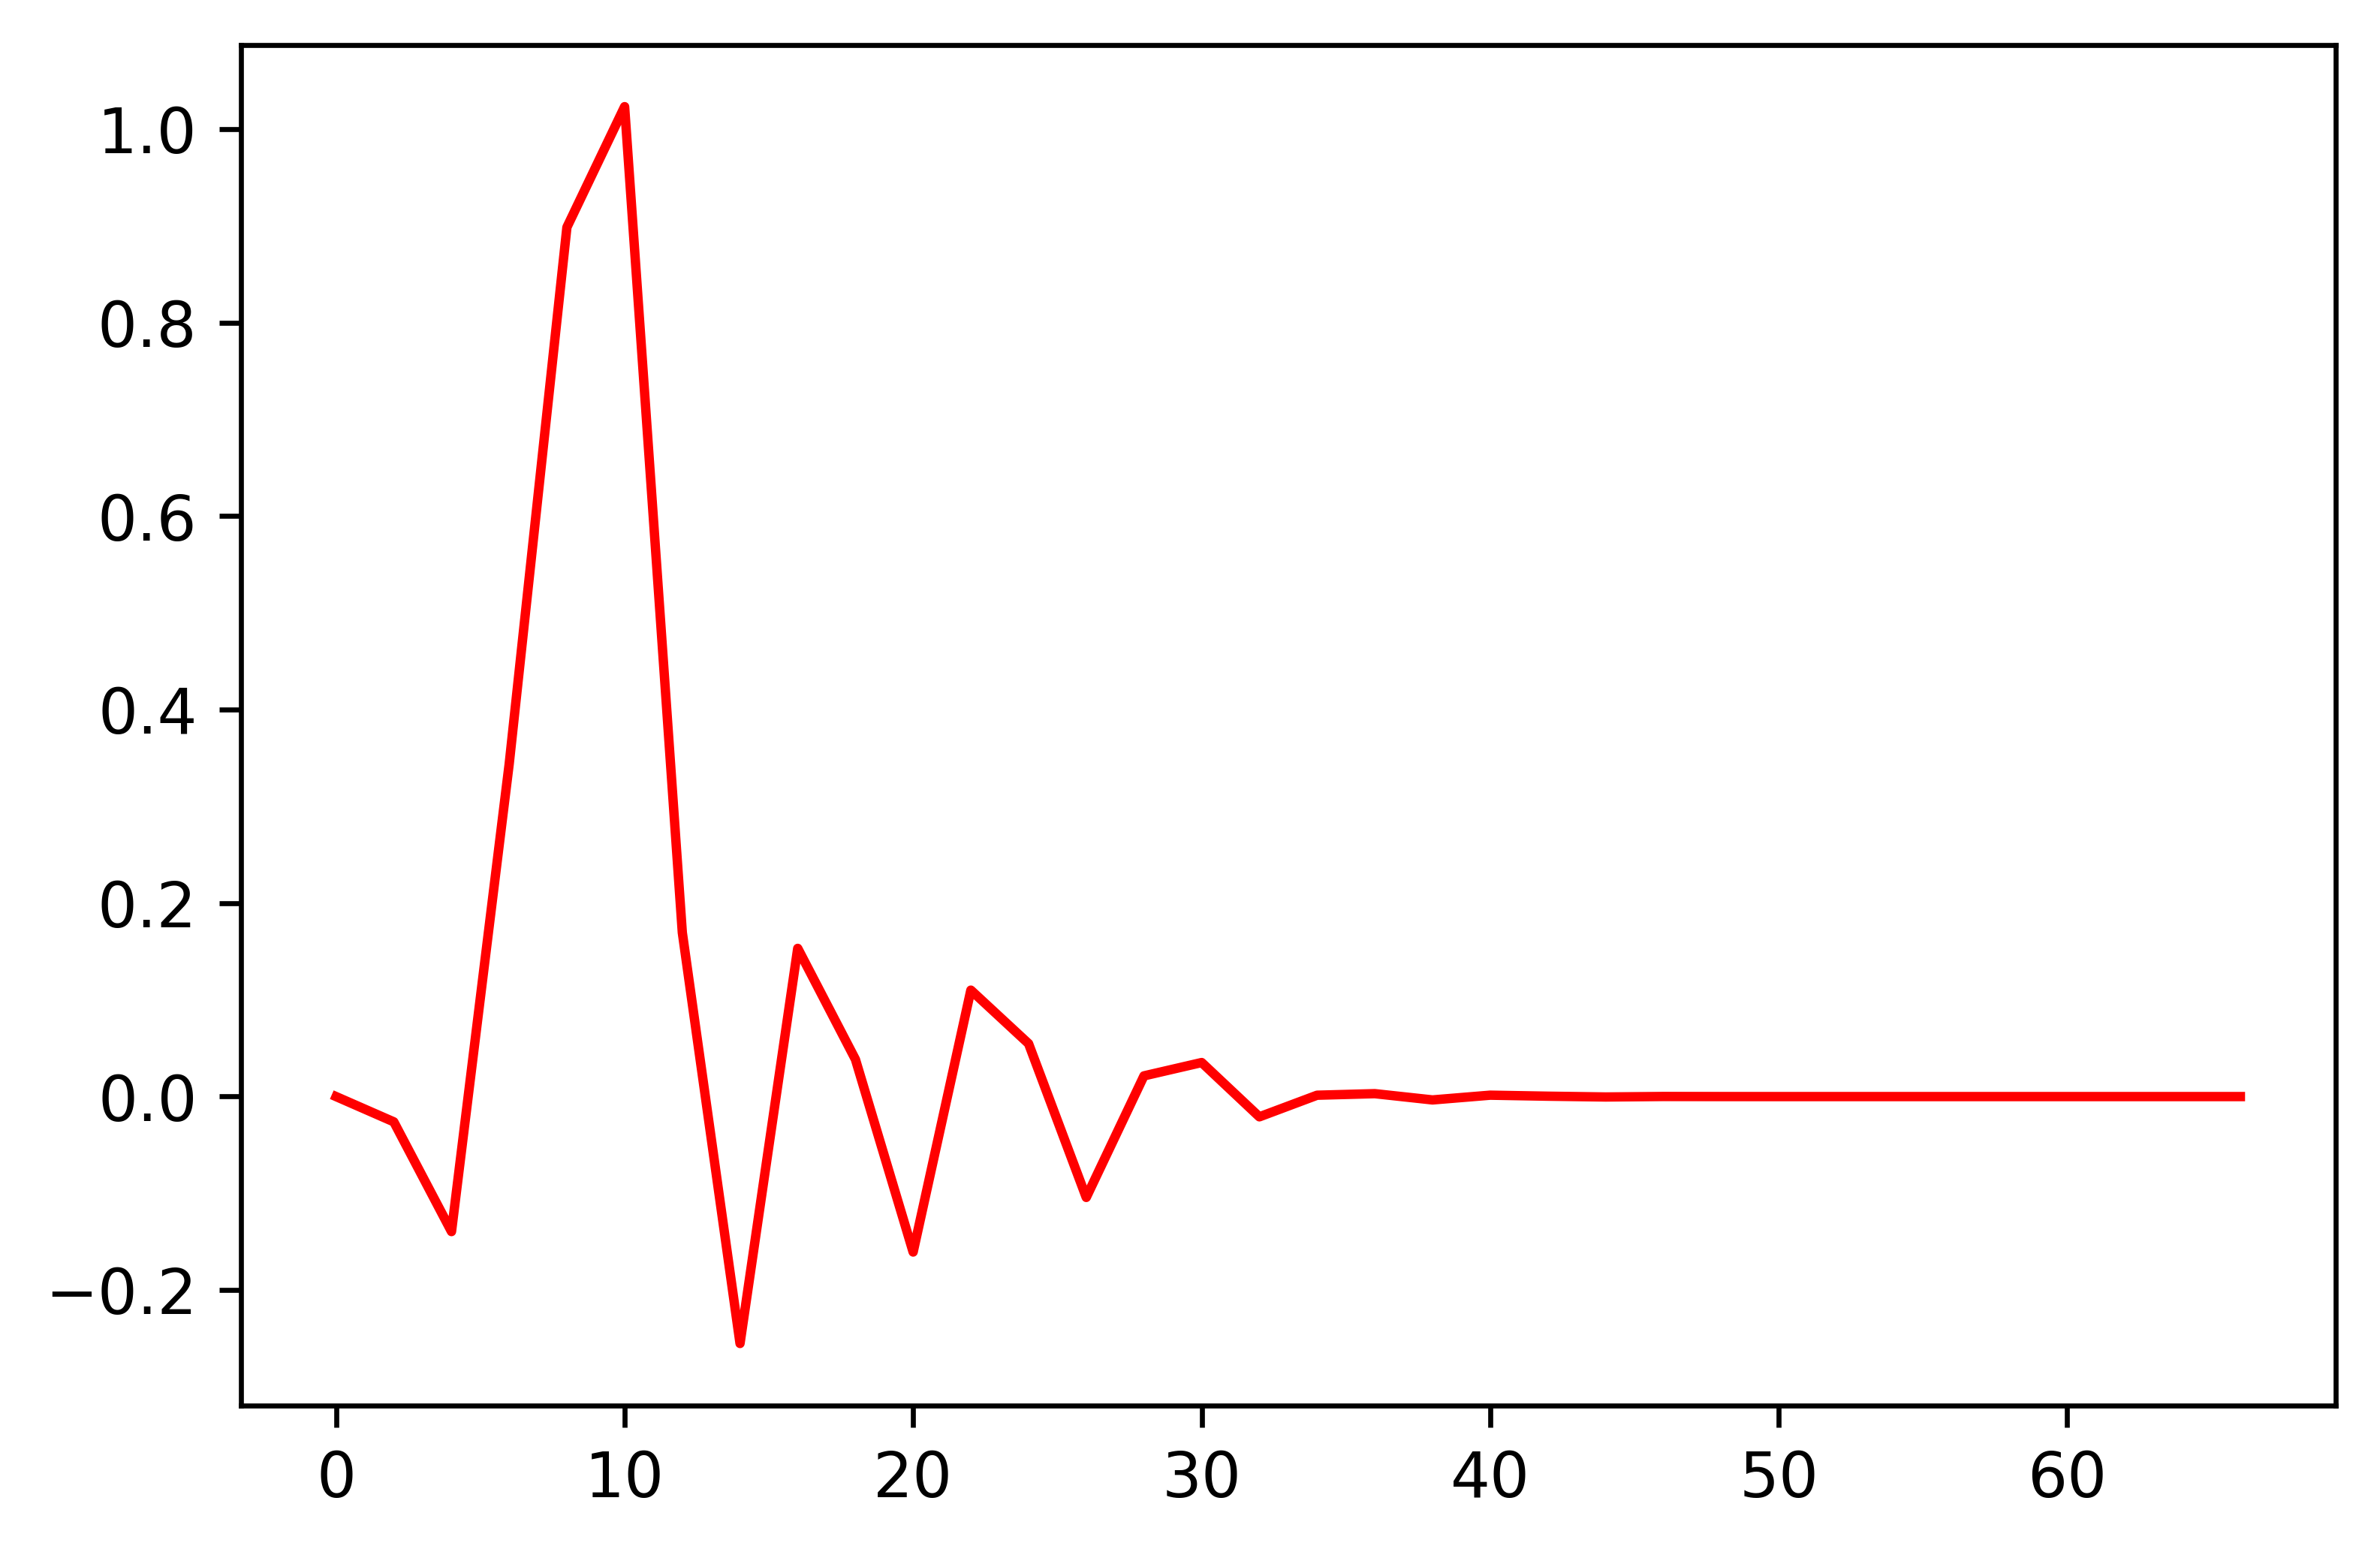

49
0.9585823865415489


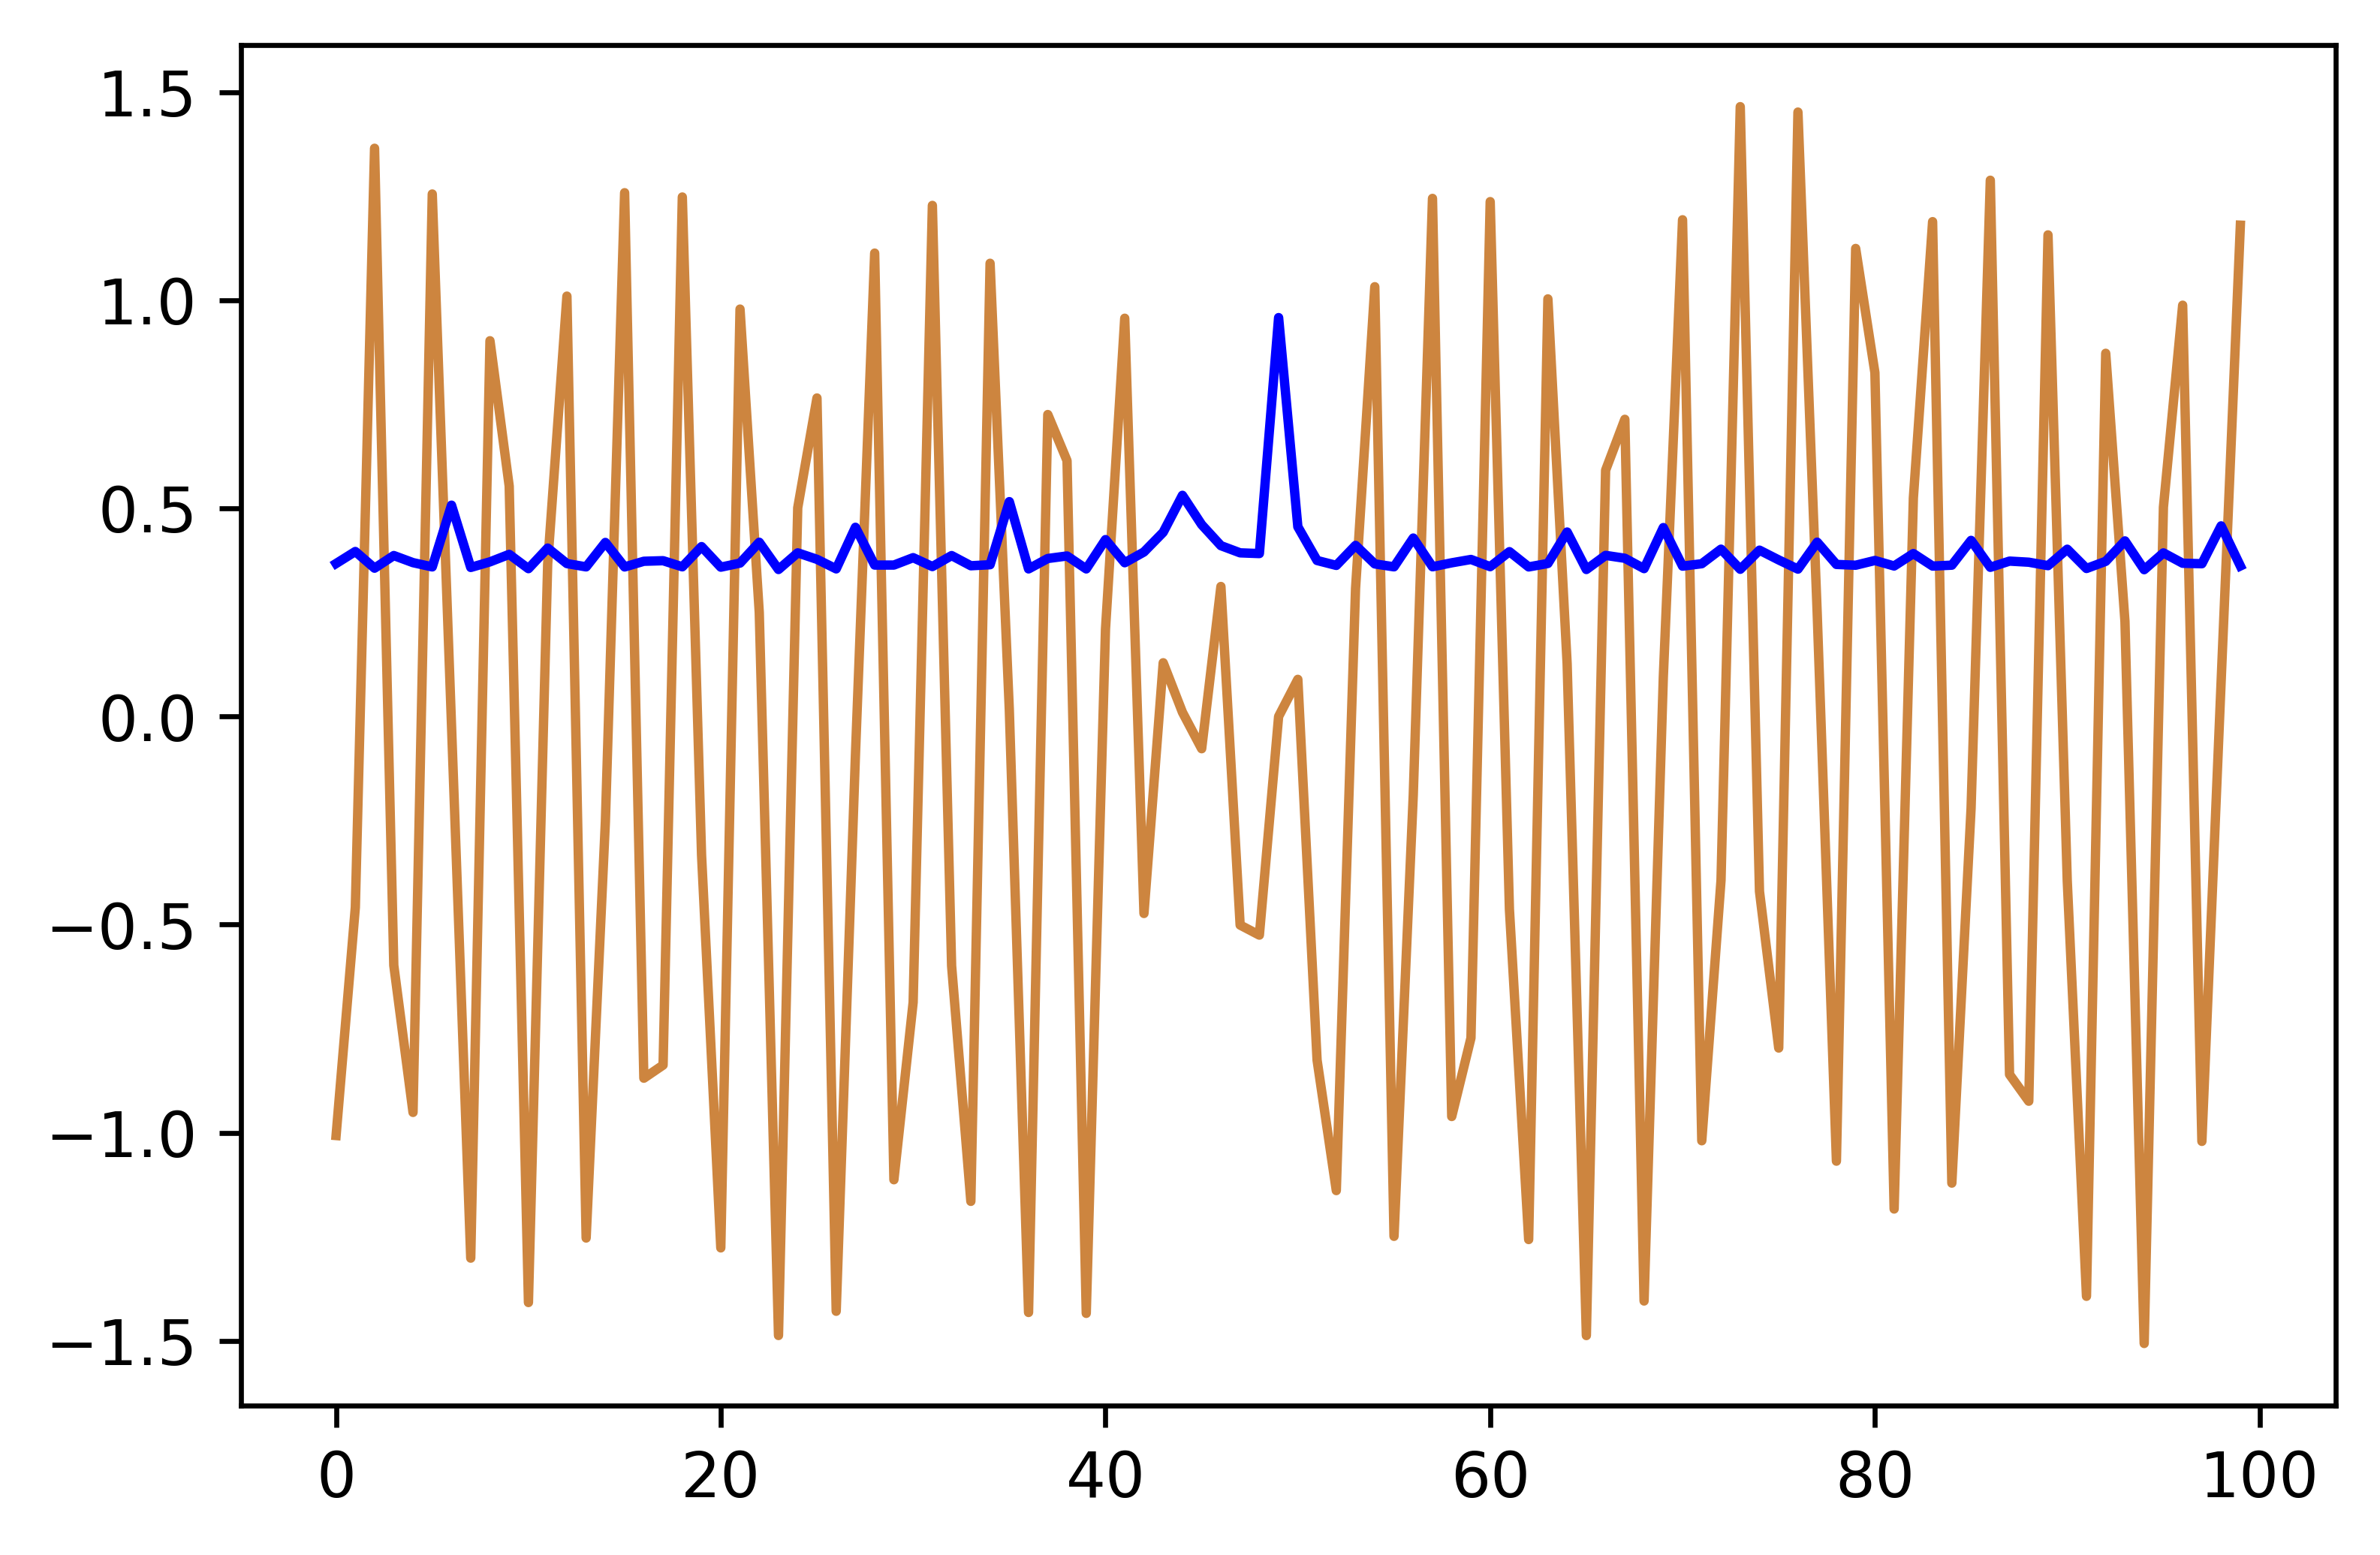

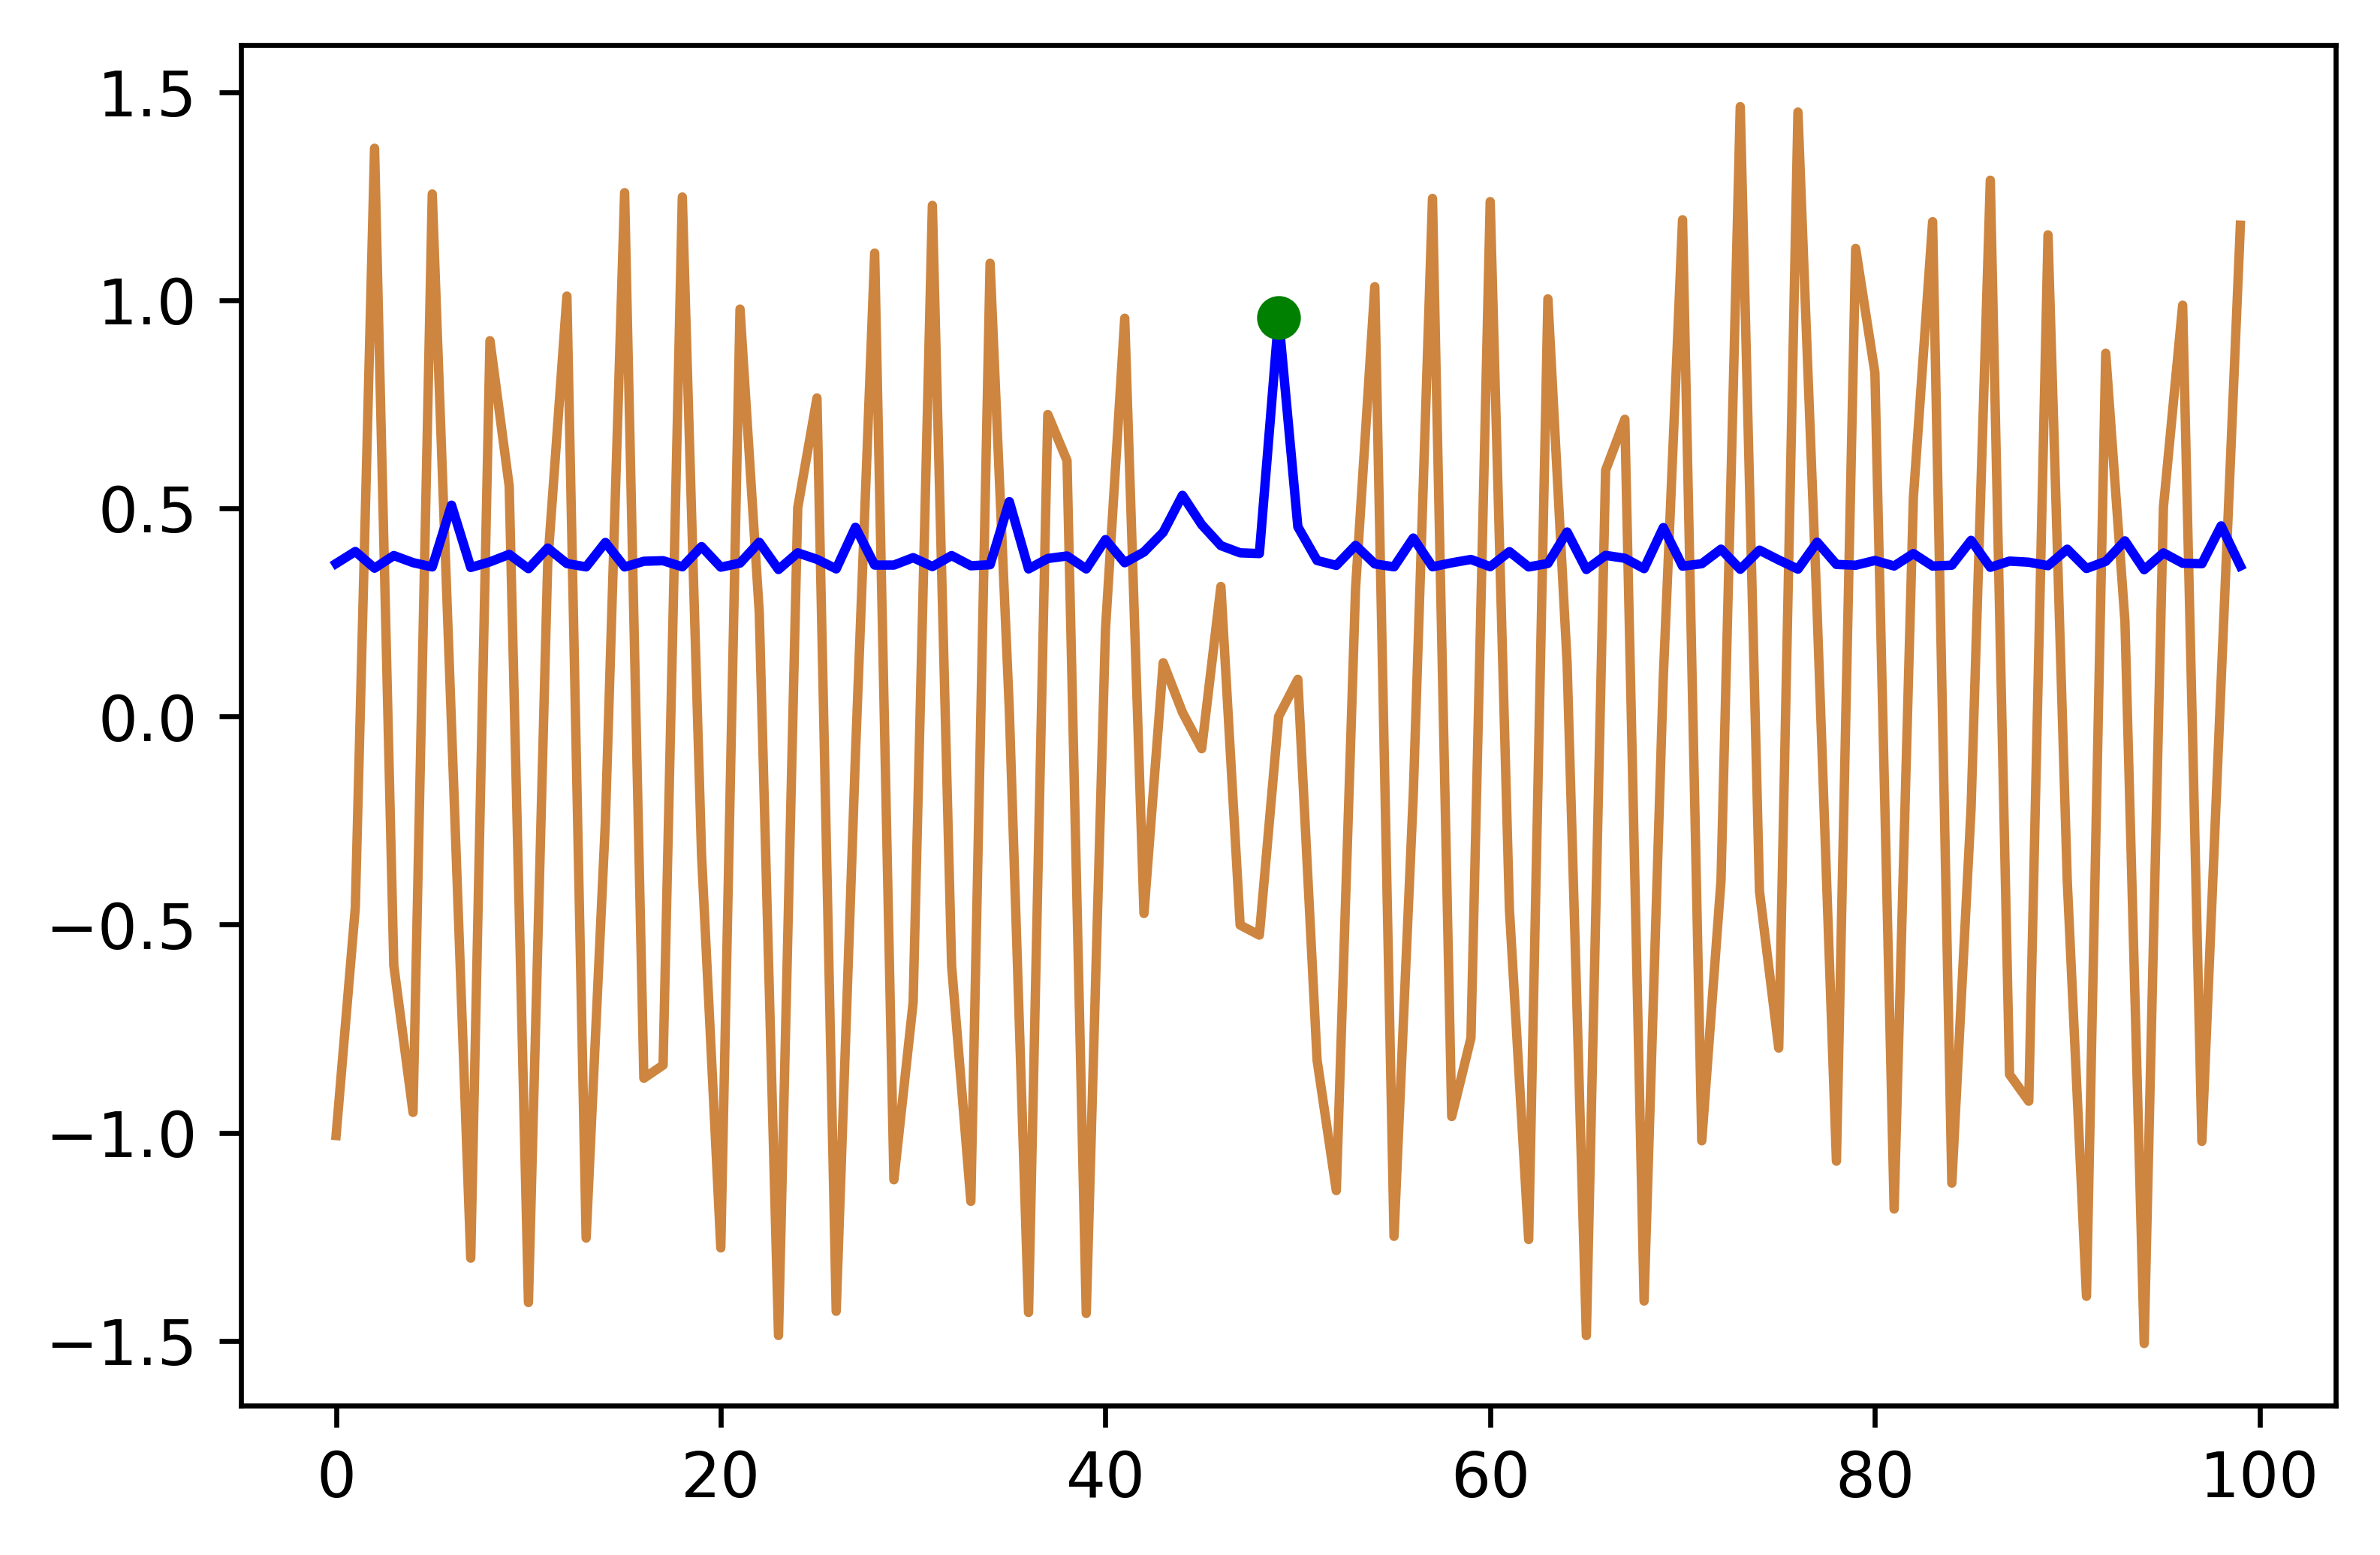

In [50]:
pattern_detector = PatternDetector(pattern)
pattern_detector.build_shapelet('lm', verbose=True)
(cA, cD) = pywt.dwt(signal, pattern_detector.shapelet, mode='per')


alpha = 0.1
s = S(cD)
x = np.arange(0,len(cD))
matplotlib.pyplot.figure(dpi=600)
plt.plot(x, cD, 'peru')
plt.plot(x, s, 'b-')

x_max = np.argmax(s)
s_max = s[x_max]

print(x_max)
print(s_max)

matplotlib.pyplot.figure(dpi=600)
plt.plot(x, cD, 'peru')
plt.plot(x, s, 'b-')
plt.plot(x_max, s_max, 'go')
plt.show()

## Precision test

In [122]:
cache = []


def predict(pattern, signal):
    pattern_detector = PatternDetector(pattern)
    
    shapelet = next((x[1] for x in cache if x[0] == pattern), None)
    if shapelet is not None:
        pattern_detector.shapelet = shapelet
    else:
        pattern_detector.build_shapelet('lm', False)
    cache.append((pattern, pattern_detector.shapelet))
        
    positions = pattern_detector.detect_pattern(signal,verbose=False,threshold=0.98)
    return positions

In [123]:
results = []
pattern_detector = None
for index, record in enumerate(test_dataset):
    res = predict(record.pattern, record.signal)
    print(f"test case: {index}")
    if len(res) == 0 and record.position == -1:
        results.append("Pattern does not exists")
    elif len(res) == 0 and record.position != -1:
        results.append("Pattern not found")
    elif len(res) != 0 and record.position == -1:
        results.append("False positive")
    else:
        min_diff = 10**10
        original_diff = -1
        for pos in res:
            diff = abs(pos-record.position)
            if min_diff > diff:
                min_diff = diff
                original_diff = pos - record.position
        results.append(original_diff)
        
    print(results[-1])

test case: 0
Pattern does not exists
test case: 1
Pattern does not exists
test case: 2
Pattern does not exists
test case: 3
Pattern not found
test case: 4
Pattern does not exists
test case: 5
Pattern does not exists
test case: 6
Pattern does not exists
test case: 7
Pattern not found
test case: 8
Pattern does not exists
test case: 9
Pattern does not exists
test case: 10
Pattern not found
test case: 11
False positive
test case: 12
Pattern does not exists
test case: 13
Pattern does not exists
test case: 14
False positive
test case: 15
Pattern not found
test case: 16
Pattern does not exists
test case: 17
Pattern does not exists
test case: 18
Pattern not found
test case: 19
Pattern not found
test case: 20
Pattern does not exists
test case: 21
Pattern does not exists
test case: 22
Pattern does not exists
test case: 23
Pattern not found
test case: 24
Pattern does not exists
test case: 25
Pattern not found
test case: 26
Pattern does not exists
test case: 27
Pattern does not exists
test case: 2

## Confusion Matrix and ROC Curve

In [124]:
real = np.array([1 if record.position != -1 else 0 for record in test_dataset])

In [125]:
pred = []
for record in test_dataset:
    positions = predict(record.pattern, record.signal)
    pred.append(0 if len(positions) == 0 else 1)
    
pred = np.array(pred)

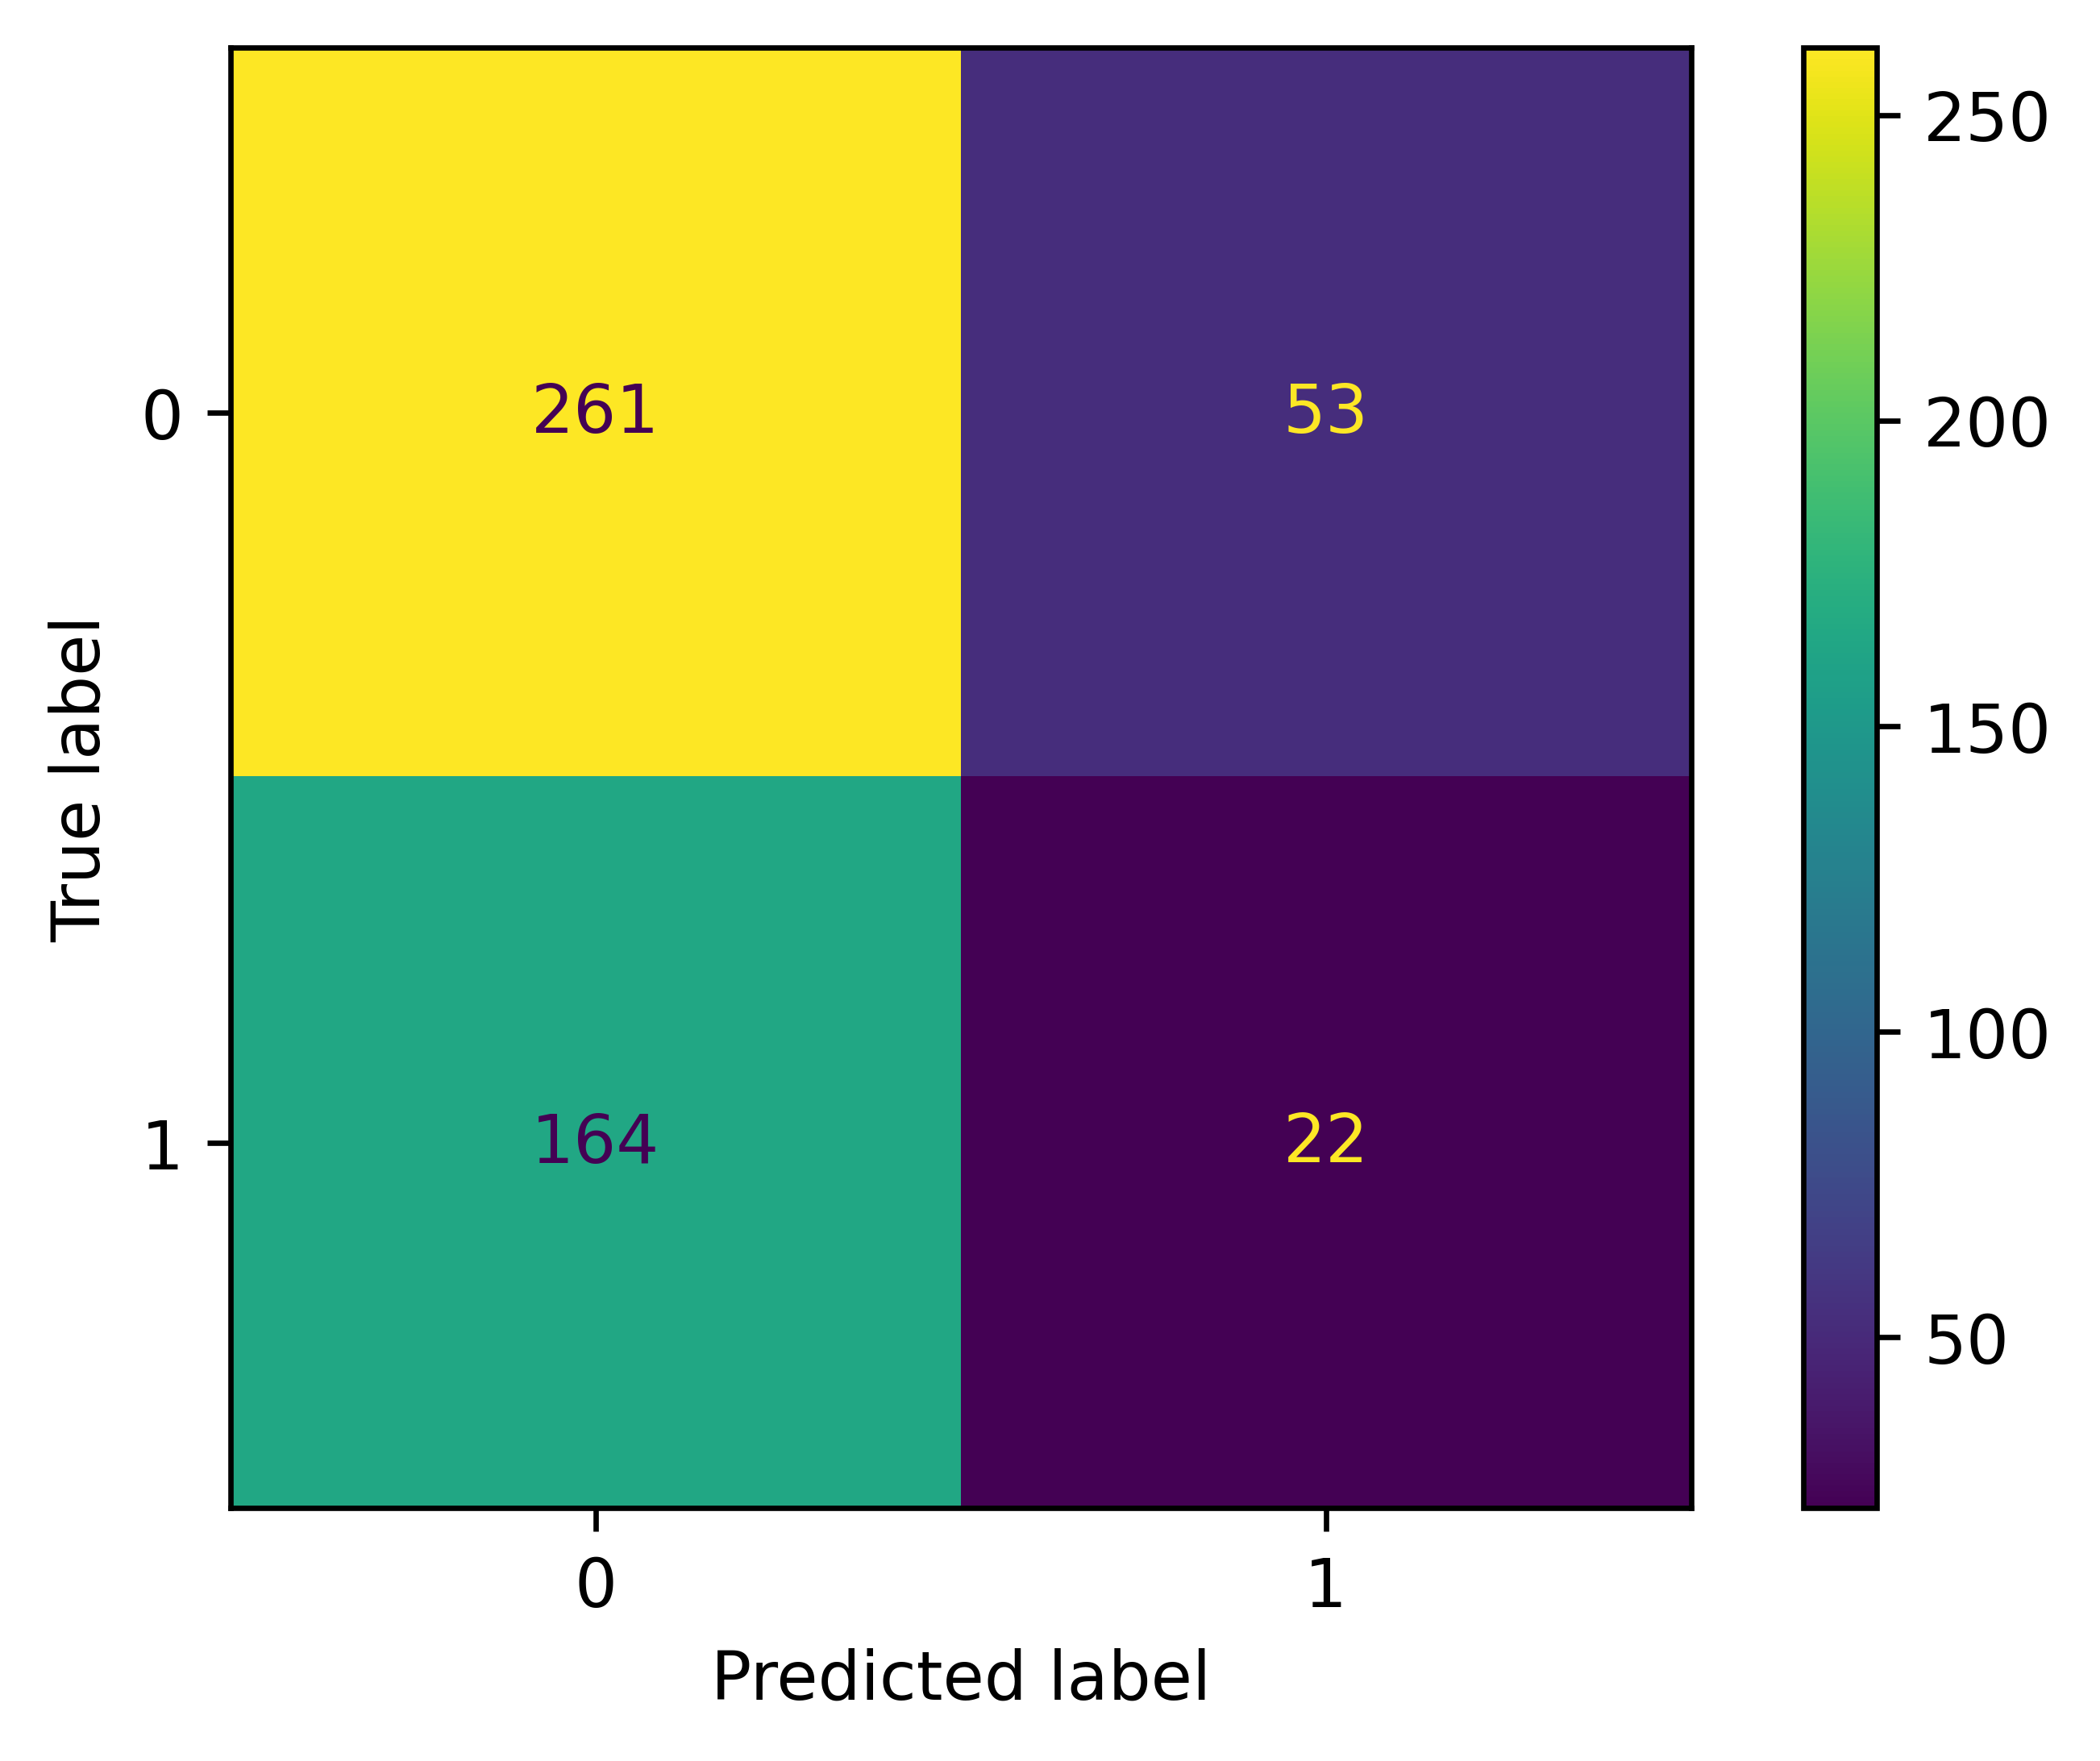

In [126]:
cm = confusion_matrix(real, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.gcf().set_dpi(600)
plt.show()

In [127]:
def stats(cm):
    #true positive  
    tp = cm[1][1]
    #false negative  
    fn = cm[1][0]
    #false positive  
    fp = cm[0][1]
    #true negative  
    tn = cm[0][0]

    TPR = tp/(tp+fn)
    print('true positive rate:'+str(TPR))
    TNR = tn/(tn+fp)
    print('true negative rate:'+str(TNR))
    PPV = tp/(tp+fp)
    print('precision or positive predictive value:'+str(PPV))
    NPV = tn/(tn+fn)
    print('negative predictive value:'+str(NPV))
    FNR = fn/(fn+tp)
    print('miss rate or false negative rate:'+str(FNR))
    FPR = fp/(fp+tn)
    print('fall out or false positive rate:'+str(FPR))
    FDR = fp/(fp+tp)
    print('false discovery:'+str(FDR))
    FOR = fn/(fn+tn)
    print('false omission:'+str(FOR))
    LR_plus = TPR/FPR
    print('positive likelihood:'+str(LR_plus))
    LR_minus = FNR/TNR
    print('negative likelihood:'+str(LR_minus))
    PT = math.sqrt(FPR)/(math.sqrt(TPR)+math.sqrt(FPR))
    print('prevalence treshhold:'+str(PT))
    TS = tp/(tp+fn+fp)
    print('threat score critical success index:'+str(TS))
    ACC = (tp+tn)/(tp+tn+fp+fn)
    print('accuracy:'+str(ACC))
    
    


In [128]:
stats(cm)

true positive rate:0.11827956989247312
true negative rate:0.8312101910828026
precision or positive predictive value:0.29333333333333333
negative predictive value:0.6141176470588235
miss rate or false negative rate:0.8817204301075269
fall out or false positive rate:0.16878980891719744
false discovery:0.7066666666666667
false omission:0.38588235294117645
positive likelihood:0.700750659362954
negative likelihood:1.0607671074856837
prevalence treshhold:0.5443336601815596
threat score critical success index:0.09205020920502092
accuracy:0.566


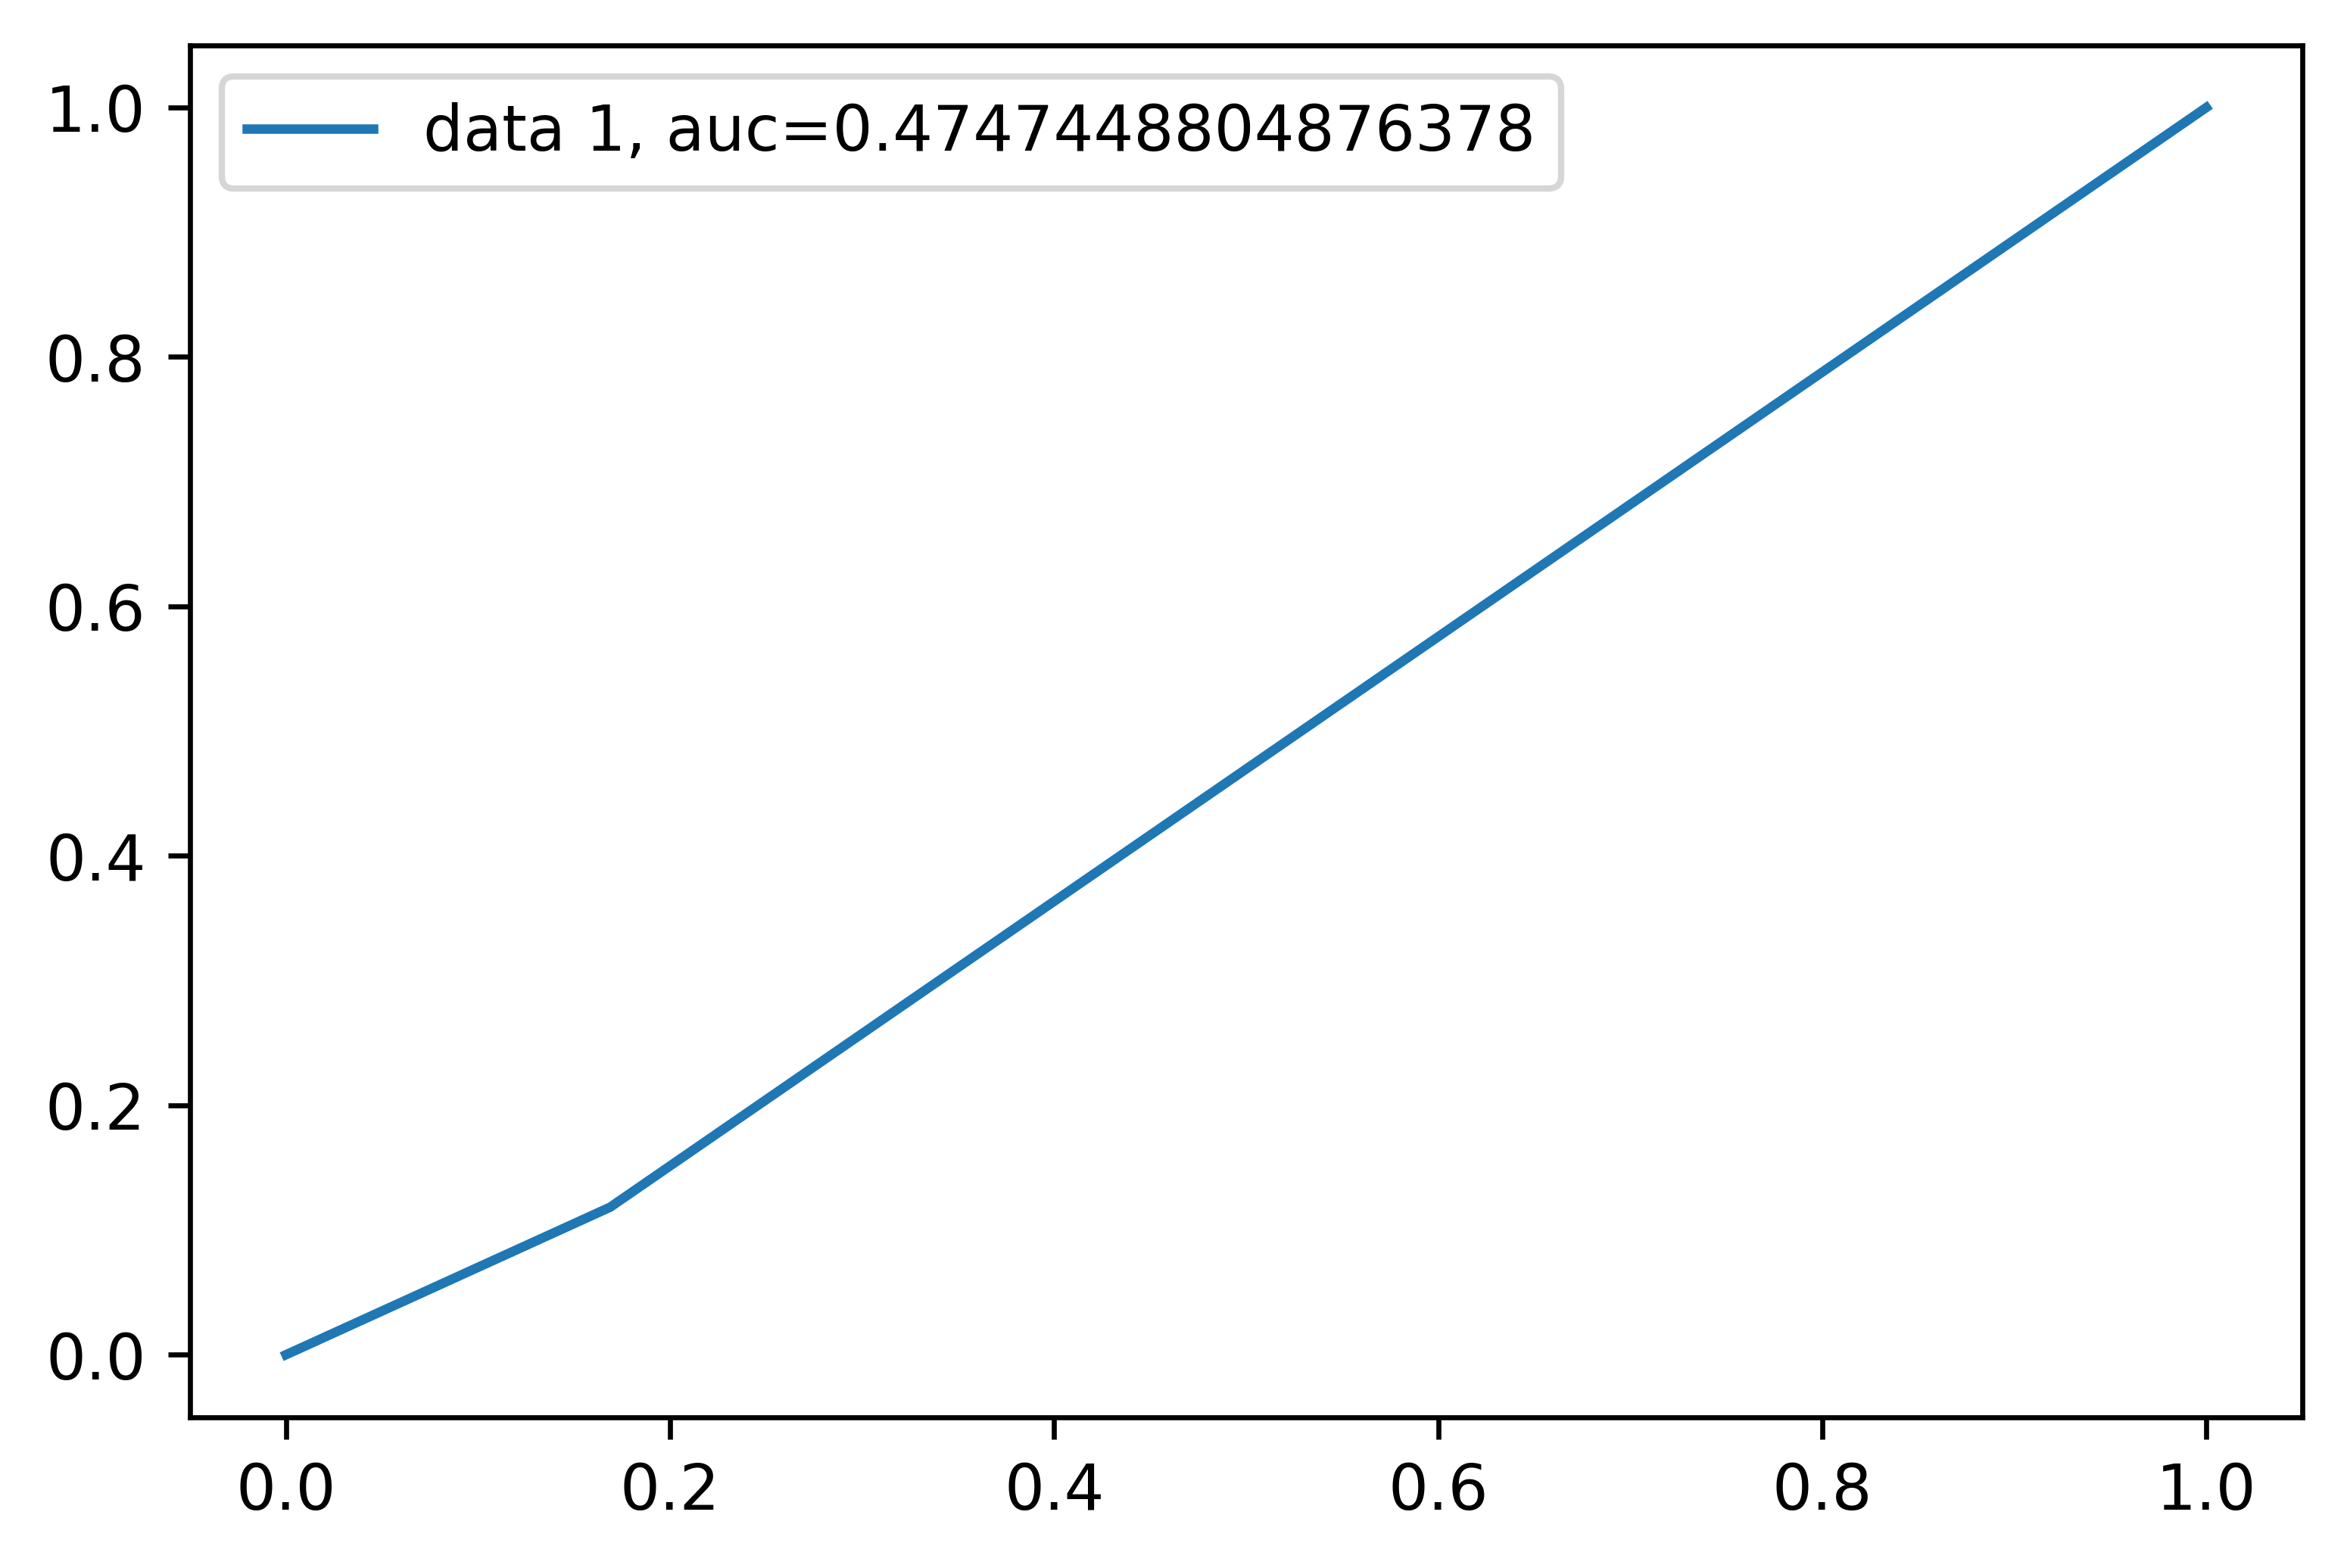

In [129]:
fpr, tpr, _ = metrics.roc_curve(real,  pred)
auc = metrics.roc_auc_score(real, pred)
plt.gcf().set_dpi(600)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend()
plt.show()

## Comparing results with other wavelets

In [130]:
def predict_with_wavelet(pattern, signal, wavelet):
    pattern_detector = PatternDetector(record.pattern)

    pattern_detector.shapelet = wavelet
    cache.append((record.pattern, pattern_detector.shapelet))
        
    positions = pattern_detector.detect_pattern(signal,threshold=0.98)
    return positions

In [131]:
pred_haar = []
pred_db = []
pred_sym = []
pred_coif = []
pred_bior = []
for record in test_dataset:
    positions = predict_with_wavelet(record.pattern, record.signal, 'haar')
    pred_haar.append(0 if len(positions) == 0 else 1)
    
    positions = predict_with_wavelet(record.pattern, record.signal, 'db3')
    pred_db.append(0 if len(positions) == 0 else 1)
    
    positions = predict_with_wavelet(record.pattern, record.signal, 'sym4')
    pred_sym.append(0 if len(positions) == 0 else 1)
    
    positions = predict_with_wavelet(record.pattern, record.signal, 'coif5')
    pred_coif.append(0 if len(positions) == 0 else 1)
    
    positions = predict_with_wavelet(record.pattern, record.signal, 'bior3.3')
    pred_bior.append(0 if len(positions) == 0 else 1)
    
    
pred_haar = np.array(pred_haar)
pred_db = np.array(pred_db)
pred_sym = np.array(pred_sym)
pred_coif = np.array(pred_coif)
pred_bior = np.array(pred_bior)

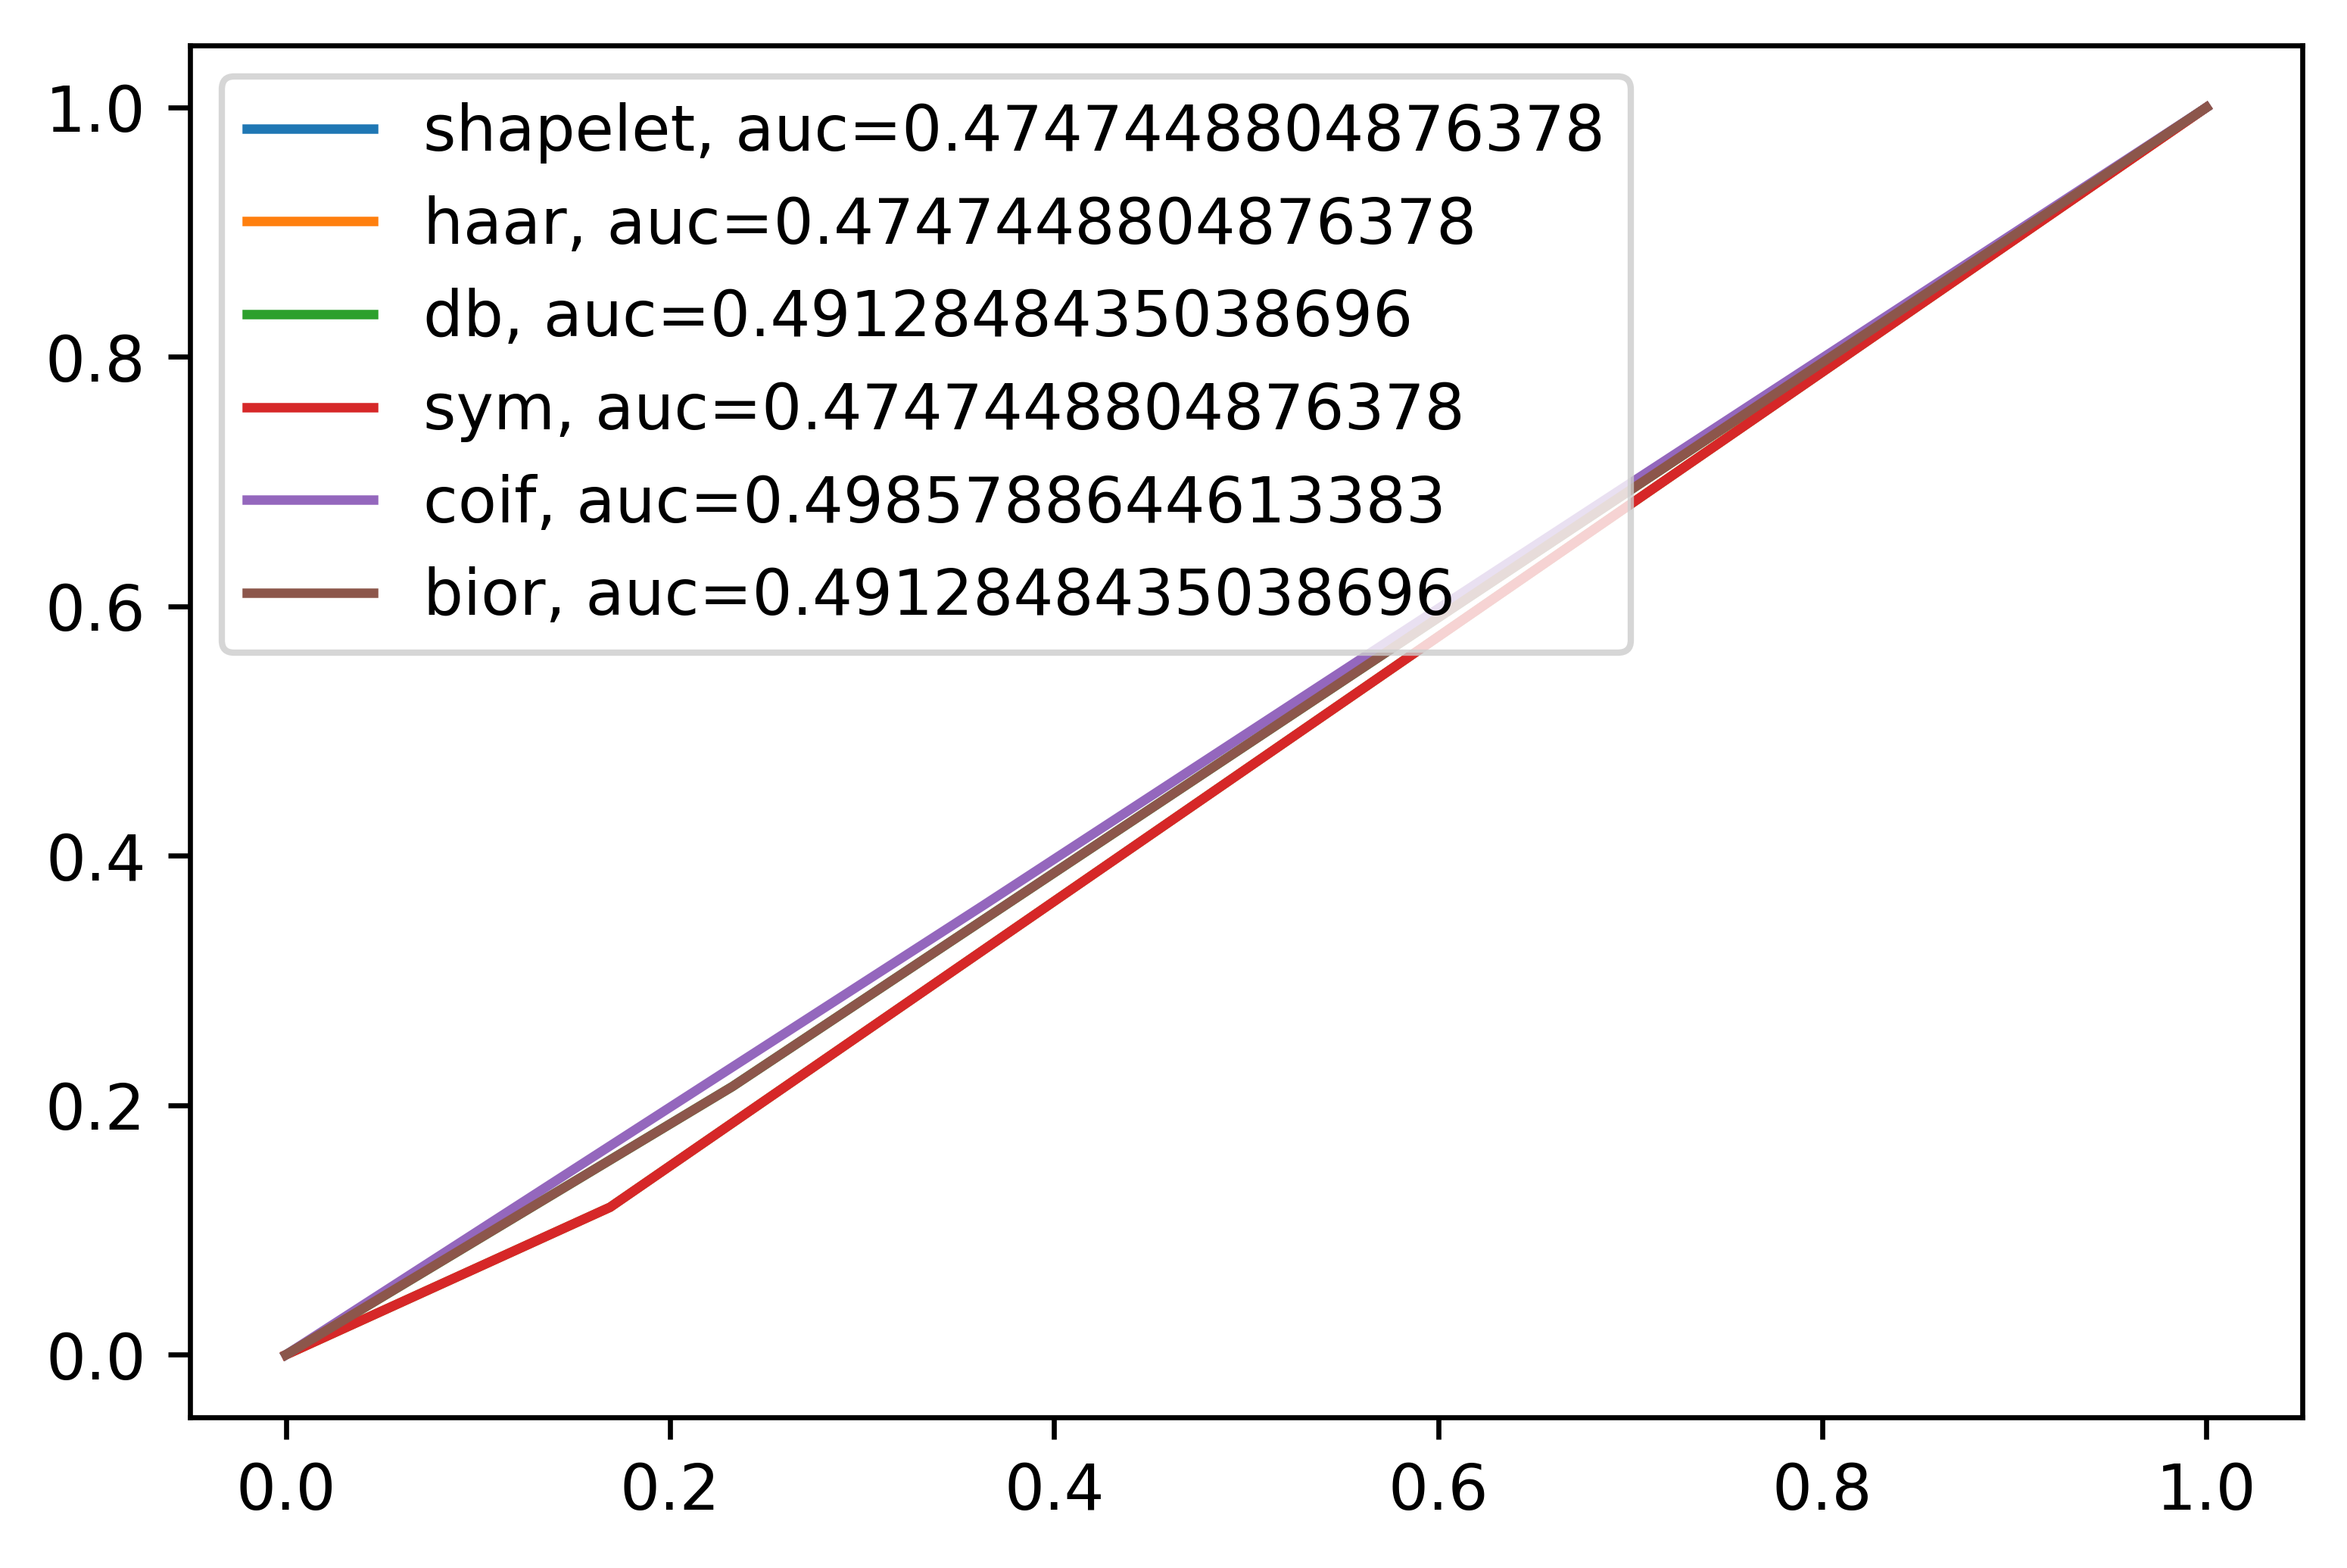

In [132]:
names = ['shapelet', 'haar', 'db', 'sym','coif','bior']
predictions = [pred, pred_haar, pred_db, pred_sym, pred_coif, pred_bior]
for n,p in zip(names,predictions):
    fpr, tpr, _ = metrics.roc_curve(real,  p)
    auc = metrics.roc_auc_score(real, p)
    plt.gcf().set_dpi(600)
    plt.plot(fpr, tpr, label=f"{n}, auc={auc}")
plt.legend()
plt.show()